In [ ]:
# !pip install pretrainedmodels==0.7.4
# !pip install efficientnet-pytorch==0.6.3
# !pip install timm==0.3.2

In [ ]:
# # CUDA 11.1
# !pip install torch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0

In [ ]:
# RMSE -> MAE Loss 꿀팁!!

In [1]:
!nvidia-smi

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Thu Oct 28 04:03:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     Off  | 00000000:1B:00.0 Off |                  Off |
| 33%   38C    P2    72W / 260W |   2338MiB / 48601MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Quadro RTX 8000     Off  | 00000000:1C:00.0 Off |                  Off |
| 33%   

In [2]:
cd /workspace/sunggu/4.Dose_img2img/scripts study

/workspace/sunggu/4.Dose_img2img/scripts study


In [3]:
import torch
print(torch.__version__)

1.10.0+cu102


In [4]:
import multiprocessing
print("CPU 갯수 = ", multiprocessing.cpu_count())

CPU 갯수 =  64


# ED_CNN

In [6]:
!python train.py \
--batch-size 160 \
--epochs 1000 \
--min-lr 5e-6 \
--lr 2e-4 \
--data-set 'Sinogram_DCM' \
--model-name 'ED_CNN' \
--criterion 'Compound Loss' \
--output_dir '/workspace/sunggu/4.Dose_img2img/model/[Privious]ED_CNN' \
--save_dir '/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/' \
--validate-every 1 \
--num_workers 4 \
--criterion_mode 'not balance' \
--teacher_forcing "False" \
--patch_training "True" \
--multi-gpu-mode 'Single'

# --multi-gpu-mode 'DataParallel' \

***********************************************
***********************************************
Dataset Name:  Sinogram_DCM
---------- Model ----------
Resume From:  
Output To:  /workspace/sunggu/4.Dose_img2img/model/[Privious]ED_CNN
Save   To:  /workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/
---------- Optimizer ----------
Learning Rate:  0.0002
Weight Decay:  0.05
Batchsize:  160
Loading dataset ....
Train [Total]  number =  6899
Valid [Total]  number =  845
Creating model: ED_CNN
Number of Learnable Params: 80961
Start training for 1000 epochs
Train: [epoch:0]  [ 0/43]  eta: 0:06:39  lr: 0.000000  loss: 0.0005 (0.0005)  time: 9.2941  data: 4.6309  max mem: 43030
Train: [epoch:0]  [42/43]  eta: 0:00:02  lr: 0.000000  loss: 0.0005 (0.0005)  time: 1.8906  data: 0.0001  max mem: 43126
Train: [epoch:0] Total time: 0:01:28 (2.0562 s / it)
Averaged stats: lr: 0.000000  loss: 0.0005 (0.0005)
Valid: [epoch:0]  [  0/845]  eta: 0:11:55  loss: 0.0002 (0.0002) 

Valid: [epoch:5]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:5]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:5]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0458  data: 0.0001  max mem: 43126
Valid: [epoch:5] Total time: 0:00:41 (0.0487 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_5_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 5.000
Train: [epoch:6]  [ 0/43]  eta: 0:03:34  lr: 0.000100  loss: 0.0000 (0.0000)  time: 4.9954  data: 3.9853  max mem: 43126
Train: [epoch:6]  [42/43]  eta: 0:00:01  lr: 0.000100  loss: 0.0000 (0.0000)  time: 1.9095  data: 0.0003  max mem: 43126
Train: [epoch:6] Total time: 0:01:25 (1.9795 s / it)
Averaged stats: lr: 0.000100  loss: 0.0000 (0.0000)
Valid: [epoch:6]  [  0/845]  eta: 0:11:40  lo

loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 11.000
Train: [epoch:12]  [ 0/43]  eta: 0:03:54  lr: 0.000200  loss: 0.0000 (0.0000)  time: 5.4436  data: 4.4327  max mem: 43126
Train: [epoch:12]  [42/43]  eta: 0:00:01  lr: 0.000200  loss: 0.0000 (0.0000)  time: 1.8992  data: 0.0003  max mem: 43126
Train: [epoch:12] Total time: 0:01:25 (1.9882 s / it)
Averaged stats: lr: 0.000200  loss: 0.0000 (0.0000)
Valid: [epoch:12]  [  0/845]  eta: 0:11:41  loss: 0.0000 (0.0000)  time: 0.8303  data: 0.4399  max mem: 43126
Valid: [epoch:12]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0466  data: 0.0001  max mem: 43126
Valid: [epoch:12]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:12]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0477  data: 0.0001  max mem: 43126
Valid: [epoch:12]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0477  data: 0.0001  max mem: 43126
Valid: [epoch

Valid: [epoch:18]  [  0/845]  eta: 0:11:40  loss: 0.0000 (0.0000)  time: 0.8293  data: 0.4085  max mem: 43126
Valid: [epoch:18]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0478  data: 0.0001  max mem: 43126
Valid: [epoch:18]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:18]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:18]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0470  data: 0.0001  max mem: 43126
Valid: [epoch:18]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:18] Total time: 0:00:41 (0.0497 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_18_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 17.000
Train: [epoch:19]  [ 0/43]  eta: 0:03:32  lr: 0.000200  

Valid: [epoch:24]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:24]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0455  data: 0.0001  max mem: 43126
Valid: [epoch:24] Total time: 0:00:41 (0.0488 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_24_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 23.000
Train: [epoch:25]  [ 0/43]  eta: 0:03:38  lr: 0.000200  loss: 0.0000 (0.0000)  time: 5.0862  data: 4.0774  max mem: 43126
Train: [epoch:25]  [42/43]  eta: 0:00:01  lr: 0.000200  loss: 0.0000 (0.0000)  time: 1.9022  data: 0.0003  max mem: 43126
Train: [epoch:25] Total time: 0:01:25 (1.9779 s / it)
Averaged stats: lr: 0.000200  loss: 0.0000 (0.0000)
Valid: [epoch:25]  [  0/845]  eta: 0:11:40  loss: 0.0000 (0.0000)  time: 0.8290  data: 0.3974  max mem: 43126
Valid: [epoch:25]  [200/845]  eta: 0

Train: [epoch:31]  [ 0/43]  eta: 0:03:27  lr: 0.000200  loss: 0.0000 (0.0000)  time: 4.8140  data: 3.7572  max mem: 43126
Train: [epoch:31]  [42/43]  eta: 0:00:01  lr: 0.000200  loss: 0.0000 (0.0000)  time: 1.9144  data: 0.0003  max mem: 43126
Train: [epoch:31] Total time: 0:01:25 (1.9774 s / it)
Averaged stats: lr: 0.000200  loss: 0.0000 (0.0000)
Valid: [epoch:31]  [  0/845]  eta: 0:11:31  loss: 0.0000 (0.0000)  time: 0.8188  data: 0.4373  max mem: 43126
Valid: [epoch:31]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0438  data: 0.0001  max mem: 43126
Valid: [epoch:31]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0441  data: 0.0001  max mem: 43126
Valid: [epoch:31]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0451  data: 0.0001  max mem: 43126
Valid: [epoch:31]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:31]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0464  data: 0.0001  max m

Valid: [epoch:37]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:37]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:37]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:37]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:37]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:37] Total time: 0:00:41 (0.0489 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_37_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 32.000
Train: [epoch:38]  [ 0/43]  eta: 0:03:37  lr: 0.000200  loss: 0.0000 (0.0000)  time: 5.0648  data: 4.0630  max mem: 43126
Train: [epoch:38]  [42/43]  eta: 0:00:01  lr

Valid: [epoch:43]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:43] Total time: 0:00:42 (0.0499 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_43_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 41.000
Train: [epoch:44]  [ 0/43]  eta: 0:03:36  lr: 0.000200  loss: 0.0000 (0.0000)  time: 5.0429  data: 4.0440  max mem: 43126
Train: [epoch:44]  [42/43]  eta: 0:00:01  lr: 0.000200  loss: 0.0000 (0.0000)  time: 1.8983  data: 0.0003  max mem: 43126
Train: [epoch:44] Total time: 0:01:24 (1.9739 s / it)
Averaged stats: lr: 0.000200  loss: 0.0000 (0.0000)
Valid: [epoch:44]  [  0/845]  eta: 0:11:58  loss: 0.0000 (0.0000)  time: 0.8506  data: 0.5602  max mem: 43126
Valid: [epoch:44]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:44]  [400/845]  eta: 0

Train: [epoch:50]  [42/43]  eta: 0:00:01  lr: 0.000200  loss: 0.0000 (0.0000)  time: 1.9053  data: 0.0003  max mem: 43126
Train: [epoch:50] Total time: 0:01:23 (1.9400 s / it)
Averaged stats: lr: 0.000200  loss: 0.0000 (0.0000)
Valid: [epoch:50]  [  0/845]  eta: 0:11:52  loss: 0.0000 (0.0000)  time: 0.8438  data: 0.4018  max mem: 43126
Valid: [epoch:50]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:50]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0474  data: 0.0001  max mem: 43126
Valid: [epoch:50]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:50]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:50]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:50] Total time: 0:00:41 (0.0492 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.

Valid: [epoch:56]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0494  data: 0.0001  max mem: 43126
Valid: [epoch:56]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0496  data: 0.0001  max mem: 43126
Valid: [epoch:56]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0001  max mem: 43126
Valid: [epoch:56]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0475  data: 0.0001  max mem: 43126
Valid: [epoch:56] Total time: 0:00:42 (0.0499 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_56_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 53.000
Train: [epoch:57]  [ 0/43]  eta: 0:03:41  lr: 0.000200  loss: 0.0000 (0.0000)  time: 5.1585  data: 4.1740  max mem: 43126
Train: [epoch:57]  [42/43]  eta: 0:00:01  lr: 0.000200  loss: 0.0000 (0.0000)  time: 1.8907  data: 0.0003  max mem: 43126
Train: [epoch:57] Total time: 0:

Valid: [epoch:62] Total time: 0:00:42 (0.0504 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_62_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 62.000
Train: [epoch:63]  [ 0/43]  eta: 0:03:12  lr: 0.000200  loss: 0.0000 (0.0000)  time: 4.4717  data: 3.4642  max mem: 43126
Train: [epoch:63]  [42/43]  eta: 0:00:01  lr: 0.000200  loss: 0.0000 (0.0000)  time: 1.8979  data: 0.0003  max mem: 43126
Train: [epoch:63] Total time: 0:01:24 (1.9557 s / it)
Averaged stats: lr: 0.000200  loss: 0.0000 (0.0000)
Valid: [epoch:63]  [  0/845]  eta: 0:11:01  loss: 0.0000 (0.0000)  time: 0.7832  data: 0.5505  max mem: 43126
Valid: [epoch:63]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:63]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:63]  [600/845]  eta: 0

Train: [epoch:69] Total time: 0:01:23 (1.9479 s / it)
Averaged stats: lr: 0.000200  loss: 0.0000 (0.0000)
Valid: [epoch:69]  [  0/845]  eta: 0:10:45  loss: 0.0000 (0.0000)  time: 0.7644  data: 0.4534  max mem: 43126
Valid: [epoch:69]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:69]  [400/845]  eta: 0:00:23  loss: 0.0000 (0.0000)  time: 0.0507  data: 0.0001  max mem: 43126
Valid: [epoch:69]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:69]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0501  data: 0.0001  max mem: 43126
Valid: [epoch:69]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.0001  max mem: 43126
Valid: [epoch:69] Total time: 0:00:42 (0.0507 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_69_input_n_20.png
loss of the network on the 845 valid 

Valid: [epoch:75]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:75]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0497  data: 0.0001  max mem: 43126
Valid: [epoch:75]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0482  data: 0.0001  max mem: 43126
Valid: [epoch:75] Total time: 0:00:42 (0.0504 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_75_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 75.000
Train: [epoch:76]  [ 0/43]  eta: 0:03:43  lr: 0.000200  loss: 0.0000 (0.0000)  time: 5.2062  data: 4.1668  max mem: 43126
Train: [epoch:76]  [42/43]  eta: 0:00:01  lr: 0.000200  loss: 0.0000 (0.0000)  time: 1.8863  data: 0.0003  max mem: 43126
Train: [epoch:76] Total time: 0:01:24 (1.9661 s / it)
Averaged stats: lr: 0.000200  loss: 0.0000 (0.0000)
Valid: [epoch:76]  [  0/845]  eta: 0

loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 81.000
Train: [epoch:82]  [ 0/43]  eta: 0:03:40  lr: 0.000200  loss: 0.0000 (0.0000)  time: 5.1302  data: 4.1228  max mem: 43126
Train: [epoch:82]  [42/43]  eta: 0:00:01  lr: 0.000200  loss: 0.0000 (0.0000)  time: 1.8896  data: 0.0004  max mem: 43126
Train: [epoch:82] Total time: 0:01:24 (1.9671 s / it)
Averaged stats: lr: 0.000200  loss: 0.0000 (0.0000)
Valid: [epoch:82]  [  0/845]  eta: 0:10:53  loss: 0.0000 (0.0000)  time: 0.7738  data: 0.5570  max mem: 43126
Valid: [epoch:82]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0474  data: 0.0001  max mem: 43126
Valid: [epoch:82]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:82]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0507  data: 0.0001  max mem: 43126
Valid: [epoch:82]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch

Valid: [epoch:88]  [  0/845]  eta: 0:11:03  loss: 0.0000 (0.0000)  time: 0.7857  data: 0.5694  max mem: 43126
Valid: [epoch:88]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:88]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:88]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:88]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0001  max mem: 43126
Valid: [epoch:88]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:88] Total time: 0:00:42 (0.0505 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_88_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 88.000
Train: [epoch:89]  [ 0/43]  eta: 0:03:33  lr: 0.000200  

Valid: [epoch:94]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0440  data: 0.0001  max mem: 43126
Valid: [epoch:94]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0469  data: 0.0001  max mem: 43126
Valid: [epoch:94] Total time: 0:00:41 (0.0491 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_94_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 88.000
Train: [epoch:95]  [ 0/43]  eta: 0:02:57  lr: 0.000200  loss: 0.0000 (0.0000)  time: 4.1375  data: 3.1139  max mem: 43126
Train: [epoch:95]  [42/43]  eta: 0:00:01  lr: 0.000200  loss: 0.0000 (0.0000)  time: 1.8925  data: 0.0003  max mem: 43126
Train: [epoch:95] Total time: 0:01:23 (1.9465 s / it)
Averaged stats: lr: 0.000200  loss: 0.0000 (0.0000)
Valid: [epoch:95]  [  0/845]  eta: 0:10:46  loss: 0.0000 (0.0000)  time: 0.7649  data: 0.5427  max mem: 43126
Valid: [epoch:95]  [200/845]  eta: 0

Train: [epoch:101]  [ 0/43]  eta: 0:03:13  lr: 0.000200  loss: 0.0000 (0.0000)  time: 4.5033  data: 3.5110  max mem: 43126
Train: [epoch:101]  [42/43]  eta: 0:00:01  lr: 0.000200  loss: 0.0000 (0.0000)  time: 1.8968  data: 0.0003  max mem: 43126
Train: [epoch:101] Total time: 0:01:24 (1.9601 s / it)
Averaged stats: lr: 0.000200  loss: 0.0000 (0.0000)
Valid: [epoch:101]  [  0/845]  eta: 0:10:52  loss: 0.0000 (0.0000)  time: 0.7727  data: 0.4822  max mem: 43126
Valid: [epoch:101]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:101]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:101]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0507  data: 0.0001  max mem: 43126
Valid: [epoch:101]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:101]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.00

Valid: [epoch:107]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0466  data: 0.0001  max mem: 43126
Valid: [epoch:107]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:107]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:107]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:107]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0475  data: 0.0001  max mem: 43126
Valid: [epoch:107] Total time: 0:00:41 (0.0491 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_107_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 101.000
Train: [epoch:108]  [ 0/43]  eta: 0:03:13  lr: 0.000198  loss: 0.0000 (0.0000)  time: 4.5061  data: 3.4959  max mem: 43126
Train: [epoch:108]  [42/43]  eta: 0

Valid: [epoch:113]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:113] Total time: 0:00:41 (0.0494 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_113_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 111.000
Train: [epoch:114]  [ 0/43]  eta: 0:03:03  lr: 0.000197  loss: 0.0000 (0.0000)  time: 4.2684  data: 3.1704  max mem: 43126
Train: [epoch:114]  [42/43]  eta: 0:00:01  lr: 0.000197  loss: 0.0000 (0.0000)  time: 1.9047  data: 0.0003  max mem: 43126
Train: [epoch:114] Total time: 0:01:24 (1.9586 s / it)
Averaged stats: lr: 0.000197  loss: 0.0000 (0.0000)
Valid: [epoch:114]  [  0/845]  eta: 0:11:34  loss: 0.0000 (0.0000)  time: 0.8214  data: 0.4061  max mem: 43126
Valid: [epoch:114]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:114]  [400/84

Train: [epoch:120]  [ 0/43]  eta: 0:02:59  lr: 0.000196  loss: 0.0000 (0.0000)  time: 4.1656  data: 3.0717  max mem: 43126
Train: [epoch:120]  [42/43]  eta: 0:00:01  lr: 0.000196  loss: 0.0000 (0.0000)  time: 1.9048  data: 0.0003  max mem: 43126
Train: [epoch:120] Total time: 0:01:24 (1.9548 s / it)
Averaged stats: lr: 0.000196  loss: 0.0000 (0.0000)
Valid: [epoch:120]  [  0/845]  eta: 0:11:52  loss: 0.0000 (0.0000)  time: 0.8433  data: 0.4418  max mem: 43126
Valid: [epoch:120]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0001  max mem: 43126
Valid: [epoch:120]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0494  data: 0.0001  max mem: 43126
Valid: [epoch:120]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:120]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0467  data: 0.0001  max mem: 43126
Valid: [epoch:120]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0462  data: 0.00

Valid: [epoch:126]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:126]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0511  data: 0.0001  max mem: 43126
Valid: [epoch:126]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:126]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0500  data: 0.0001  max mem: 43126
Valid: [epoch:126]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0472  data: 0.0001  max mem: 43126
Valid: [epoch:126] Total time: 0:00:41 (0.0495 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_126_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 123.000
Train: [epoch:127]  [ 0/43]  eta: 0:03:17  lr: 0.000194  loss: 0.0000 (0.0000)  time: 4.5870  data: 3.5834  max mem: 43126
Train: [epoch:127]  [42/43]  eta: 0

Valid: [epoch:132]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0453  data: 0.0001  max mem: 43126
Valid: [epoch:132] Total time: 0:00:40 (0.0483 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_132_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 131.000
Train: [epoch:133]  [ 0/43]  eta: 0:03:16  lr: 0.000193  loss: 0.0000 (0.0000)  time: 4.5787  data: 3.4577  max mem: 43126
Train: [epoch:133]  [42/43]  eta: 0:00:01  lr: 0.000193  loss: 0.0000 (0.0000)  time: 1.8994  data: 0.0003  max mem: 43126
Train: [epoch:133] Total time: 0:01:24 (1.9611 s / it)
Averaged stats: lr: 0.000193  loss: 0.0000 (0.0000)
Valid: [epoch:133]  [  0/845]  eta: 0:11:43  loss: 0.0000 (0.0000)  time: 0.8328  data: 0.4411  max mem: 43126
Valid: [epoch:133]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0466  data: 0.0001  max mem: 43126
Valid: [epoch:133]  [400/84

Train: [epoch:139]  [ 0/43]  eta: 0:02:37  lr: 0.000192  loss: 0.0000 (0.0000)  time: 3.6647  data: 2.6213  max mem: 43126
Train: [epoch:139]  [42/43]  eta: 0:00:01  lr: 0.000192  loss: 0.0000 (0.0000)  time: 1.8987  data: 0.0003  max mem: 43126
Train: [epoch:139] Total time: 0:01:23 (1.9407 s / it)
Averaged stats: lr: 0.000192  loss: 0.0000 (0.0000)
Valid: [epoch:139]  [  0/845]  eta: 0:11:43  loss: 0.0000 (0.0000)  time: 0.8325  data: 0.4455  max mem: 43126
Valid: [epoch:139]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:139]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:139]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0001  max mem: 43126
Valid: [epoch:139]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0411  data: 0.0001  max mem: 43126
Valid: [epoch:139]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0456  data: 0.00

Valid: [epoch:145]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0496  data: 0.0001  max mem: 43126
Valid: [epoch:145]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:145]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0473  data: 0.0001  max mem: 43126
Valid: [epoch:145]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:145]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0474  data: 0.0001  max mem: 43126
Valid: [epoch:145] Total time: 0:00:41 (0.0492 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_145_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 144.000
Train: [epoch:146]  [ 0/43]  eta: 0:02:53  lr: 0.000190  loss: 0.0000 (0.0000)  time: 4.0357  data: 3.0433  max mem: 43126
Train: [epoch:146]  [42/43]  eta: 0

Valid: [epoch:151]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:151] Total time: 0:00:41 (0.0493 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_151_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 149.000
Train: [epoch:152]  [ 0/43]  eta: 0:03:27  lr: 0.000189  loss: 0.0000 (0.0000)  time: 4.8201  data: 3.8336  max mem: 43126
Train: [epoch:152]  [42/43]  eta: 0:00:01  lr: 0.000189  loss: 0.0000 (0.0000)  time: 1.9003  data: 0.0003  max mem: 43126
Train: [epoch:152] Total time: 0:01:24 (1.9703 s / it)
Averaged stats: lr: 0.000189  loss: 0.0000 (0.0000)
Valid: [epoch:152]  [  0/845]  eta: 0:11:40  loss: 0.0000 (0.0000)  time: 0.8296  data: 0.4071  max mem: 43126
Valid: [epoch:152]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0461  data: 0.0001  max mem: 43126
Valid: [epoch:152]  [400/84

Train: [epoch:158]  [ 0/43]  eta: 0:03:38  lr: 0.000187  loss: 0.0000 (0.0000)  time: 5.0785  data: 4.0038  max mem: 43126
Train: [epoch:158]  [42/43]  eta: 0:00:01  lr: 0.000187  loss: 0.0000 (0.0000)  time: 1.9032  data: 0.0003  max mem: 43126
Train: [epoch:158] Total time: 0:01:25 (1.9775 s / it)
Averaged stats: lr: 0.000187  loss: 0.0000 (0.0000)
Valid: [epoch:158]  [  0/845]  eta: 0:11:26  loss: 0.0000 (0.0000)  time: 0.8118  data: 0.5101  max mem: 43126
Valid: [epoch:158]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0505  data: 0.0001  max mem: 43126
Valid: [epoch:158]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0001  max mem: 43126
Valid: [epoch:158]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0500  data: 0.0001  max mem: 43126
Valid: [epoch:158]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0451  data: 0.0001  max mem: 43126
Valid: [epoch:158]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0458  data: 0.00

Valid: [epoch:164]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0477  data: 0.0001  max mem: 43126
Valid: [epoch:164]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:164]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:164]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.0001  max mem: 43126
Valid: [epoch:164]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0461  data: 0.0001  max mem: 43126
Valid: [epoch:164] Total time: 0:00:41 (0.0486 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_164_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 162.000
Train: [epoch:165]  [ 0/43]  eta: 0:02:34  lr: 0.000186  loss: 0.0000 (0.0000)  time: 3.6015  data: 2.5901  max mem: 43126
Train: [epoch:165]  [42/43]  eta: 0

Valid: [epoch:170]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0468  data: 0.0001  max mem: 43126
Valid: [epoch:170] Total time: 0:00:41 (0.0488 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_170_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 165.000
Train: [epoch:171]  [ 0/43]  eta: 0:03:42  lr: 0.000184  loss: 0.0000 (0.0000)  time: 5.1718  data: 4.0043  max mem: 43126
Train: [epoch:171]  [42/43]  eta: 0:00:01  lr: 0.000184  loss: 0.0000 (0.0000)  time: 1.8967  data: 0.0003  max mem: 43126
Train: [epoch:171] Total time: 0:01:25 (1.9776 s / it)
Averaged stats: lr: 0.000184  loss: 0.0000 (0.0000)
Valid: [epoch:171]  [  0/845]  eta: 0:11:25  loss: 0.0000 (0.0000)  time: 0.8114  data: 0.4133  max mem: 43126
Valid: [epoch:171]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:171]  [400/84

Train: [epoch:177]  [ 0/43]  eta: 0:03:18  lr: 0.000183  loss: 0.0000 (0.0000)  time: 4.6116  data: 3.6036  max mem: 43126
Train: [epoch:177]  [42/43]  eta: 0:00:01  lr: 0.000183  loss: 0.0000 (0.0000)  time: 1.9268  data: 0.0003  max mem: 43126
Train: [epoch:177] Total time: 0:01:25 (1.9844 s / it)
Averaged stats: lr: 0.000183  loss: 0.0000 (0.0000)
Valid: [epoch:177]  [  0/845]  eta: 0:11:12  loss: 0.0000 (0.0000)  time: 0.7962  data: 0.5933  max mem: 43126
Valid: [epoch:177]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:177]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0473  data: 0.0001  max mem: 43126
Valid: [epoch:177]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0496  data: 0.0001  max mem: 43126
Valid: [epoch:177]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0469  data: 0.0001  max mem: 43126
Valid: [epoch:177]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0455  data: 0.00

Valid: [epoch:183]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0424  data: 0.0001  max mem: 43126
Valid: [epoch:183]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0475  data: 0.0001  max mem: 43126
Valid: [epoch:183]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:183]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0509  data: 0.0001  max mem: 43126
Valid: [epoch:183]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0477  data: 0.0001  max mem: 43126
Valid: [epoch:183] Total time: 0:00:41 (0.0486 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_183_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 175.000
Train: [epoch:184]  [ 0/43]  eta: 0:03:05  lr: 0.000182  loss: 0.0000 (0.0000)  time: 4.3245  data: 3.3244  max mem: 43126
Train: [epoch:184]  [42/43]  eta: 0

Valid: [epoch:189]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0461  data: 0.0001  max mem: 43126
Valid: [epoch:189] Total time: 0:00:41 (0.0490 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_189_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 189.000
Train: [epoch:190]  [ 0/43]  eta: 0:03:16  lr: 0.000180  loss: 0.0000 (0.0000)  time: 4.5603  data: 3.5009  max mem: 43126
Train: [epoch:190]  [42/43]  eta: 0:00:01  lr: 0.000180  loss: 0.0000 (0.0000)  time: 1.8963  data: 0.0002  max mem: 43126
Train: [epoch:190] Total time: 0:01:24 (1.9615 s / it)
Averaged stats: lr: 0.000180  loss: 0.0000 (0.0000)
Valid: [epoch:190]  [  0/845]  eta: 0:11:56  loss: 0.0000 (0.0000)  time: 0.8474  data: 0.3983  max mem: 43126
Valid: [epoch:190]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:190]  [400/84

Train: [epoch:196]  [ 0/43]  eta: 0:03:38  lr: 0.000179  loss: 0.0000 (0.0000)  time: 5.0869  data: 4.0453  max mem: 43126
Train: [epoch:196]  [42/43]  eta: 0:00:01  lr: 0.000179  loss: 0.0000 (0.0000)  time: 1.9105  data: 0.0003  max mem: 43126
Train: [epoch:196] Total time: 0:01:25 (1.9796 s / it)
Averaged stats: lr: 0.000179  loss: 0.0000 (0.0000)
Valid: [epoch:196]  [  0/845]  eta: 0:11:45  loss: 0.0000 (0.0000)  time: 0.8352  data: 0.4174  max mem: 43126
Valid: [epoch:196]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.0001  max mem: 43126
Valid: [epoch:196]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0458  data: 0.0001  max mem: 43126
Valid: [epoch:196]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:196]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:196]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0468  data: 0.00

Valid: [epoch:202]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:202]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0491  data: 0.0001  max mem: 43126
Valid: [epoch:202]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0464  data: 0.0001  max mem: 43126
Valid: [epoch:202]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:202]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0461  data: 0.0001  max mem: 43126
Valid: [epoch:202] Total time: 0:00:41 (0.0497 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_202_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 201.000
Train: [epoch:203]  [ 0/43]  eta: 0:02:34  lr: 0.000177  loss: 0.0000 (0.0000)  time: 3.5842  data: 2.5277  max mem: 43126
Train: [epoch:203]  [42/43]  eta: 0

Valid: [epoch:208]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0455  data: 0.0001  max mem: 43126
Valid: [epoch:208] Total time: 0:00:41 (0.0489 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_208_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 201.000
Train: [epoch:209]  [ 0/43]  eta: 0:03:17  lr: 0.000176  loss: 0.0000 (0.0000)  time: 4.5948  data: 3.5502  max mem: 43126
Train: [epoch:209]  [42/43]  eta: 0:00:01  lr: 0.000176  loss: 0.0000 (0.0000)  time: 1.8965  data: 0.0003  max mem: 43126
Train: [epoch:209] Total time: 0:01:24 (1.9627 s / it)
Averaged stats: lr: 0.000176  loss: 0.0000 (0.0000)
Valid: [epoch:209]  [  0/845]  eta: 0:10:44  loss: 0.0000 (0.0000)  time: 0.7632  data: 0.4367  max mem: 43126
Valid: [epoch:209]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:209]  [400/84

Train: [epoch:215]  [ 0/43]  eta: 0:03:34  lr: 0.000175  loss: 0.0000 (0.0000)  time: 4.9851  data: 3.9848  max mem: 43126
Train: [epoch:215]  [42/43]  eta: 0:00:01  lr: 0.000175  loss: 0.0000 (0.0000)  time: 1.8978  data: 0.0003  max mem: 43126
Train: [epoch:215] Total time: 0:01:24 (1.9691 s / it)
Averaged stats: lr: 0.000175  loss: 0.0000 (0.0000)
Valid: [epoch:215]  [  0/845]  eta: 0:11:28  loss: 0.0000 (0.0000)  time: 0.8154  data: 0.4289  max mem: 43126
Valid: [epoch:215]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:215]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0452  data: 0.0001  max mem: 43126
Valid: [epoch:215]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0475  data: 0.0001  max mem: 43126
Valid: [epoch:215]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:215]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0455  data: 0.00

Valid: [epoch:221]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0463  data: 0.0001  max mem: 43126
Valid: [epoch:221]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:221]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:221]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0469  data: 0.0001  max mem: 43126
Valid: [epoch:221]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:221] Total time: 0:00:41 (0.0489 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_221_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 216.000
Train: [epoch:222]  [ 0/43]  eta: 0:02:54  lr: 0.000173  loss: 0.0000 (0.0000)  time: 4.0517  data: 3.0285  max mem: 43126
Train: [epoch:222]  [42/43]  eta: 0

Valid: [epoch:227]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0417  data: 0.0001  max mem: 43126
Valid: [epoch:227] Total time: 0:00:40 (0.0485 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_227_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 216.000
Train: [epoch:228]  [ 0/43]  eta: 0:03:30  lr: 0.000172  loss: 0.0000 (0.0000)  time: 4.9067  data: 3.9067  max mem: 43126
Train: [epoch:228]  [42/43]  eta: 0:00:01  lr: 0.000172  loss: 0.0000 (0.0000)  time: 1.9051  data: 0.0003  max mem: 43126
Train: [epoch:228] Total time: 0:01:25 (1.9804 s / it)
Averaged stats: lr: 0.000172  loss: 0.0000 (0.0000)
Valid: [epoch:228]  [  0/845]  eta: 0:10:42  loss: 0.0000 (0.0000)  time: 0.7602  data: 0.4734  max mem: 43126
Valid: [epoch:228]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0499  data: 0.0001  max mem: 43126
Valid: [epoch:228]  [400/84

Train: [epoch:234]  [ 0/43]  eta: 0:02:59  lr: 0.000170  loss: 0.0000 (0.0000)  time: 4.1792  data: 3.1391  max mem: 43126
Train: [epoch:234]  [42/43]  eta: 0:00:01  lr: 0.000170  loss: 0.0000 (0.0000)  time: 1.9066  data: 0.0003  max mem: 43126
Train: [epoch:234] Total time: 0:01:24 (1.9579 s / it)
Averaged stats: lr: 0.000170  loss: 0.0000 (0.0000)
Valid: [epoch:234]  [  0/845]  eta: 0:11:47  loss: 0.0000 (0.0000)  time: 0.8377  data: 0.4455  max mem: 43126
Valid: [epoch:234]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:234]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0499  data: 0.0001  max mem: 43126
Valid: [epoch:234]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:234]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:234]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0457  data: 0.00

Valid: [epoch:240]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0473  data: 0.0001  max mem: 43126
Valid: [epoch:240]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0500  data: 0.0001  max mem: 43126
Valid: [epoch:240]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0001  max mem: 43126
Valid: [epoch:240]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0449  data: 0.0001  max mem: 43126
Valid: [epoch:240]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0421  data: 0.0001  max mem: 43126
Valid: [epoch:240] Total time: 0:00:41 (0.0489 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_240_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 236.000
Train: [epoch:241]  [ 0/43]  eta: 0:02:39  lr: 0.000169  loss: 0.0000 (0.0000)  time: 3.7097  data: 2.7062  max mem: 43126
Train: [epoch:241]  [42/43]  eta: 0

Valid: [epoch:246]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0477  data: 0.0001  max mem: 43126
Valid: [epoch:246] Total time: 0:00:42 (0.0506 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_246_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 236.000
Train: [epoch:247]  [ 0/43]  eta: 0:03:33  lr: 0.000168  loss: 0.0000 (0.0000)  time: 4.9603  data: 3.9050  max mem: 43126
Train: [epoch:247]  [42/43]  eta: 0:00:01  lr: 0.000168  loss: 0.0000 (0.0000)  time: 1.8960  data: 0.0003  max mem: 43126
Train: [epoch:247] Total time: 0:01:24 (1.9706 s / it)
Averaged stats: lr: 0.000168  loss: 0.0000 (0.0000)
Valid: [epoch:247]  [  0/845]  eta: 0:10:41  loss: 0.0000 (0.0000)  time: 0.7597  data: 0.4869  max mem: 43126
Valid: [epoch:247]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:247]  [400/84

Train: [epoch:253]  [ 0/43]  eta: 0:02:58  lr: 0.000166  loss: 0.0000 (0.0000)  time: 4.1497  data: 3.1497  max mem: 43126
Train: [epoch:253]  [42/43]  eta: 0:00:01  lr: 0.000166  loss: 0.0000 (0.0000)  time: 1.9070  data: 0.0003  max mem: 43126
Train: [epoch:253] Total time: 0:01:24 (1.9614 s / it)
Averaged stats: lr: 0.000166  loss: 0.0000 (0.0000)
Valid: [epoch:253]  [  0/845]  eta: 0:10:49  loss: 0.0000 (0.0000)  time: 0.7686  data: 0.4164  max mem: 43126
Valid: [epoch:253]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:253]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:253]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:253]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0497  data: 0.0001  max mem: 43126
Valid: [epoch:253]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0470  data: 0.00

Valid: [epoch:259]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0500  data: 0.0001  max mem: 43126
Valid: [epoch:259]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0502  data: 0.0001  max mem: 43126
Valid: [epoch:259]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:259]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:259]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:259] Total time: 0:00:41 (0.0492 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_259_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 248.000
Train: [epoch:260]  [ 0/43]  eta: 0:03:33  lr: 0.000165  loss: 0.0000 (0.0000)  time: 4.9548  data: 3.9742  max mem: 43126
Train: [epoch:260]  [42/43]  eta: 0

Valid: [epoch:265]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0458  data: 0.0001  max mem: 43126
Valid: [epoch:265] Total time: 0:00:41 (0.0493 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_265_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 261.000
Train: [epoch:266]  [ 0/43]  eta: 0:03:25  lr: 0.000163  loss: 0.0000 (0.0000)  time: 4.7677  data: 3.6908  max mem: 43126
Train: [epoch:266]  [42/43]  eta: 0:00:01  lr: 0.000163  loss: 0.0000 (0.0000)  time: 1.9062  data: 0.0003  max mem: 43126
Train: [epoch:266] Total time: 0:01:25 (1.9802 s / it)
Averaged stats: lr: 0.000163  loss: 0.0000 (0.0000)
Valid: [epoch:266]  [  0/845]  eta: 0:11:09  loss: 0.0000 (0.0000)  time: 0.7923  data: 0.4492  max mem: 43126
Valid: [epoch:266]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.0001  max mem: 43126
Valid: [epoch:266]  [400/84

Train: [epoch:272]  [ 0/43]  eta: 0:03:44  lr: 0.000162  loss: 0.0000 (0.0000)  time: 5.2104  data: 4.0494  max mem: 43126
Train: [epoch:272]  [42/43]  eta: 0:00:01  lr: 0.000162  loss: 0.0000 (0.0000)  time: 1.8936  data: 0.0003  max mem: 43126
Train: [epoch:272] Total time: 0:01:24 (1.9750 s / it)
Averaged stats: lr: 0.000162  loss: 0.0000 (0.0000)
Valid: [epoch:272]  [  0/845]  eta: 0:11:47  loss: 0.0000 (0.0000)  time: 0.8376  data: 0.4082  max mem: 43126
Valid: [epoch:272]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0516  data: 0.0001  max mem: 43126
Valid: [epoch:272]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0001  max mem: 43126
Valid: [epoch:272]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.0001  max mem: 43126
Valid: [epoch:272]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.0001  max mem: 43126
Valid: [epoch:272]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.00

Valid: [epoch:278]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:278]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0451  data: 0.0001  max mem: 43126
Valid: [epoch:278]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:278]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0496  data: 0.0001  max mem: 43126
Valid: [epoch:278]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0408  data: 0.0001  max mem: 43126
Valid: [epoch:278] Total time: 0:00:40 (0.0483 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_278_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 261.000
Train: [epoch:279]  [ 0/43]  eta: 0:02:59  lr: 0.000160  loss: 0.0000 (0.0000)  time: 4.1634  data: 3.1757  max mem: 43126
Train: [epoch:279]  [42/43]  eta: 0

Valid: [epoch:284]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:284] Total time: 0:00:41 (0.0487 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_284_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 283.000
Train: [epoch:285]  [ 0/43]  eta: 0:02:39  lr: 0.000159  loss: 0.0000 (0.0000)  time: 3.7024  data: 2.6665  max mem: 43126
Train: [epoch:285]  [42/43]  eta: 0:00:01  lr: 0.000159  loss: 0.0000 (0.0000)  time: 1.9013  data: 0.0003  max mem: 43126
Train: [epoch:285] Total time: 0:01:23 (1.9427 s / it)
Averaged stats: lr: 0.000159  loss: 0.0000 (0.0000)
Valid: [epoch:285]  [  0/845]  eta: 0:12:03  loss: 0.0000 (0.0000)  time: 0.8557  data: 0.4006  max mem: 43126
Valid: [epoch:285]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:285]  [400/84

Train: [epoch:291]  [ 0/43]  eta: 0:03:36  lr: 0.000158  loss: 0.0000 (0.0000)  time: 5.0302  data: 4.0390  max mem: 43126
Train: [epoch:291]  [42/43]  eta: 0:00:01  lr: 0.000158  loss: 0.0000 (0.0000)  time: 1.9046  data: 0.0003  max mem: 43126
Train: [epoch:291] Total time: 0:01:24 (1.9744 s / it)
Averaged stats: lr: 0.000158  loss: 0.0000 (0.0000)
Valid: [epoch:291]  [  0/845]  eta: 0:11:21  loss: 0.0000 (0.0000)  time: 0.8059  data: 0.4131  max mem: 43126
Valid: [epoch:291]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0001  max mem: 43126
Valid: [epoch:291]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0444  data: 0.0001  max mem: 43126
Valid: [epoch:291]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:291]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:291]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0441  data: 0.00

Valid: [epoch:297]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0443  data: 0.0001  max mem: 43126
Valid: [epoch:297]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0472  data: 0.0001  max mem: 43126
Valid: [epoch:297]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:297]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0464  data: 0.0001  max mem: 43126
Valid: [epoch:297]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.0001  max mem: 43126
Valid: [epoch:297] Total time: 0:00:40 (0.0484 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_297_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 283.000
Train: [epoch:298]  [ 0/43]  eta: 0:02:53  lr: 0.000156  loss: 0.0000 (0.0000)  time: 4.0267  data: 3.0121  max mem: 43126
Train: [epoch:298]  [42/43]  eta: 0

Valid: [epoch:303]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0461  data: 0.0001  max mem: 43126
Valid: [epoch:303] Total time: 0:00:41 (0.0497 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_303_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 298.000
Train: [epoch:304]  [ 0/43]  eta: 0:03:18  lr: 0.000155  loss: 0.0000 (0.0000)  time: 4.6181  data: 3.6128  max mem: 43126
Train: [epoch:304]  [42/43]  eta: 0:00:01  lr: 0.000155  loss: 0.0000 (0.0000)  time: 1.9096  data: 0.0003  max mem: 43126
Train: [epoch:304] Total time: 0:01:24 (1.9708 s / it)
Averaged stats: lr: 0.000155  loss: 0.0000 (0.0000)
Valid: [epoch:304]  [  0/845]  eta: 0:11:36  loss: 0.0000 (0.0000)  time: 0.8246  data: 0.4162  max mem: 43126
Valid: [epoch:304]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.0001  max mem: 43126
Valid: [epoch:304]  [400/84

Train: [epoch:310]  [ 0/43]  eta: 0:02:50  lr: 0.000154  loss: 0.0000 (0.0000)  time: 3.9619  data: 2.7736  max mem: 43126
Train: [epoch:310]  [42/43]  eta: 0:00:01  lr: 0.000154  loss: 0.0000 (0.0000)  time: 1.9003  data: 0.0003  max mem: 43126
Train: [epoch:310] Total time: 0:01:23 (1.9529 s / it)
Averaged stats: lr: 0.000154  loss: 0.0000 (0.0000)
Valid: [epoch:310]  [  0/845]  eta: 0:11:29  loss: 0.0000 (0.0000)  time: 0.8165  data: 0.4061  max mem: 43126
Valid: [epoch:310]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0475  data: 0.0001  max mem: 43126
Valid: [epoch:310]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:310]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0467  data: 0.0001  max mem: 43126
Valid: [epoch:310]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:310]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0434  data: 0.00

Valid: [epoch:316]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:316]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0445  data: 0.0001  max mem: 43126
Valid: [epoch:316]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.0001  max mem: 43126
Valid: [epoch:316]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:316]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0469  data: 0.0001  max mem: 43126
Valid: [epoch:316] Total time: 0:00:40 (0.0484 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_316_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 314.000
Train: [epoch:317]  [ 0/43]  eta: 0:02:50  lr: 0.000152  loss: 0.0000 (0.0000)  time: 3.9580  data: 2.9553  max mem: 43126
Train: [epoch:317]  [42/43]  eta: 0

Valid: [epoch:322]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0415  data: 0.0002  max mem: 43126
Valid: [epoch:322] Total time: 0:00:40 (0.0485 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_322_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 320.000
Train: [epoch:323]  [ 0/43]  eta: 0:03:39  lr: 0.000151  loss: 0.0000 (0.0000)  time: 5.1050  data: 4.1143  max mem: 43126
Train: [epoch:323]  [42/43]  eta: 0:00:01  lr: 0.000151  loss: 0.0000 (0.0000)  time: 1.8991  data: 0.0003  max mem: 43126
Train: [epoch:323] Total time: 0:01:25 (1.9780 s / it)
Averaged stats: lr: 0.000151  loss: 0.0000 (0.0000)
Valid: [epoch:323]  [  0/845]  eta: 0:11:25  loss: 0.0000 (0.0000)  time: 0.8112  data: 0.5551  max mem: 43126
Valid: [epoch:323]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0440  data: 0.0001  max mem: 43126
Valid: [epoch:323]  [400/84

Train: [epoch:329]  [ 0/43]  eta: 0:03:12  lr: 0.000149  loss: 0.0000 (0.0000)  time: 4.4855  data: 3.4447  max mem: 43126
Train: [epoch:329]  [42/43]  eta: 0:00:01  lr: 0.000149  loss: 0.0000 (0.0000)  time: 1.9014  data: 0.0003  max mem: 43126
Train: [epoch:329] Total time: 0:01:24 (1.9633 s / it)
Averaged stats: lr: 0.000149  loss: 0.0000 (0.0000)
Valid: [epoch:329]  [  0/845]  eta: 0:11:37  loss: 0.0000 (0.0000)  time: 0.8250  data: 0.4330  max mem: 43126
Valid: [epoch:329]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0001  max mem: 43126
Valid: [epoch:329]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0472  data: 0.0001  max mem: 43126
Valid: [epoch:329]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0458  data: 0.0001  max mem: 43126
Valid: [epoch:329]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0474  data: 0.0001  max mem: 43126
Valid: [epoch:329]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0445  data: 0.00

Valid: [epoch:335]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0491  data: 0.0001  max mem: 43126
Valid: [epoch:335]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:335]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:335]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:335]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:335] Total time: 0:00:41 (0.0496 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_335_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 320.000
Train: [epoch:336]  [ 0/43]  eta: 0:03:32  lr: 0.000148  loss: 0.0000 (0.0000)  time: 4.9518  data: 3.8612  max mem: 43126
Train: [epoch:336]  [42/43]  eta: 0

Valid: [epoch:341]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0001  max mem: 43126
Valid: [epoch:341] Total time: 0:00:41 (0.0488 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_341_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 341.000
Train: [epoch:342]  [ 0/43]  eta: 0:03:12  lr: 0.000146  loss: 0.0000 (0.0000)  time: 4.4764  data: 3.4507  max mem: 43126
Train: [epoch:342]  [42/43]  eta: 0:00:01  lr: 0.000146  loss: 0.0000 (0.0000)  time: 1.8996  data: 0.0003  max mem: 43126
Train: [epoch:342] Total time: 0:01:24 (1.9605 s / it)
Averaged stats: lr: 0.000146  loss: 0.0000 (0.0000)
Valid: [epoch:342]  [  0/845]  eta: 0:11:58  loss: 0.0000 (0.0000)  time: 0.8498  data: 0.4225  max mem: 43126
Valid: [epoch:342]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:342]  [400/84

Train: [epoch:348]  [ 0/43]  eta: 0:03:31  lr: 0.000145  loss: 0.0000 (0.0000)  time: 4.9270  data: 3.9090  max mem: 43126
Train: [epoch:348]  [42/43]  eta: 0:00:01  lr: 0.000145  loss: 0.0000 (0.0000)  time: 1.9049  data: 0.0003  max mem: 43126
Train: [epoch:348] Total time: 0:01:24 (1.9743 s / it)
Averaged stats: lr: 0.000145  loss: 0.0000 (0.0000)
Valid: [epoch:348]  [  0/845]  eta: 0:12:04  loss: 0.0000 (0.0000)  time: 0.8569  data: 0.4425  max mem: 43126
Valid: [epoch:348]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0472  data: 0.0001  max mem: 43126
Valid: [epoch:348]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0482  data: 0.0001  max mem: 43126
Valid: [epoch:348]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:348]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0440  data: 0.0001  max mem: 43126
Valid: [epoch:348]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.00

Valid: [epoch:354]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0437  data: 0.0001  max mem: 43126
Valid: [epoch:354]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0002  max mem: 43126
Valid: [epoch:354]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:354]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0001  max mem: 43126
Valid: [epoch:354]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0423  data: 0.0001  max mem: 43126
Valid: [epoch:354] Total time: 0:00:40 (0.0485 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_354_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 341.000
Train: [epoch:355]  [ 0/43]  eta: 0:03:41  lr: 0.000144  loss: 0.0000 (0.0000)  time: 5.1576  data: 4.0615  max mem: 43126
Train: [epoch:355]  [42/43]  eta: 0

Valid: [epoch:360]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0447  data: 0.0001  max mem: 43126
Valid: [epoch:360] Total time: 0:00:41 (0.0487 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_360_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 360.000
Train: [epoch:361]  [ 0/43]  eta: 0:02:41  lr: 0.000142  loss: 0.0000 (0.0000)  time: 3.7458  data: 2.7352  max mem: 43126
Train: [epoch:361]  [42/43]  eta: 0:00:01  lr: 0.000142  loss: 0.0000 (0.0000)  time: 1.8990  data: 0.0003  max mem: 43126
Train: [epoch:361] Total time: 0:01:23 (1.9429 s / it)
Averaged stats: lr: 0.000142  loss: 0.0000 (0.0000)
Valid: [epoch:361]  [  0/845]  eta: 0:11:34  loss: 0.0000 (0.0000)  time: 0.8224  data: 0.5542  max mem: 43126
Valid: [epoch:361]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0478  data: 0.0001  max mem: 43126
Valid: [epoch:361]  [400/84

Train: [epoch:367]  [ 0/43]  eta: 0:03:30  lr: 0.000141  loss: 0.0000 (0.0000)  time: 4.8955  data: 3.8962  max mem: 43126
Train: [epoch:367]  [42/43]  eta: 0:00:01  lr: 0.000141  loss: 0.0000 (0.0000)  time: 1.8988  data: 0.0003  max mem: 43126
Train: [epoch:367] Total time: 0:01:24 (1.9714 s / it)
Averaged stats: lr: 0.000141  loss: 0.0000 (0.0000)
Valid: [epoch:367]  [  0/845]  eta: 0:11:10  loss: 0.0000 (0.0000)  time: 0.7936  data: 0.4359  max mem: 43126
Valid: [epoch:367]  [200/845]  eta: 0:00:31  loss: 0.0000 (0.0000)  time: 0.0433  data: 0.0001  max mem: 43126
Valid: [epoch:367]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0502  data: 0.0001  max mem: 43126
Valid: [epoch:367]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0504  data: 0.0001  max mem: 43126
Valid: [epoch:367]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:367]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.00

Valid: [epoch:373]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0472  data: 0.0001  max mem: 43126
Valid: [epoch:373]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:373]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0435  data: 0.0001  max mem: 43126
Valid: [epoch:373]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:373]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0459  data: 0.0001  max mem: 43126
Valid: [epoch:373] Total time: 0:00:41 (0.0488 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_373_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 360.000
Train: [epoch:374]  [ 0/43]  eta: 0:03:18  lr: 0.000139  loss: 0.0000 (0.0000)  time: 4.6064  data: 3.6120  max mem: 43126
Train: [epoch:374]  [42/43]  eta: 0

Valid: [epoch:379]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0423  data: 0.0001  max mem: 43126
Valid: [epoch:379] Total time: 0:00:41 (0.0491 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_379_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 375.000
Train: [epoch:380]  [ 0/43]  eta: 0:03:26  lr: 0.000138  loss: 0.0000 (0.0000)  time: 4.7908  data: 3.7713  max mem: 43126
Train: [epoch:380]  [42/43]  eta: 0:00:01  lr: 0.000138  loss: 0.0000 (0.0000)  time: 1.9000  data: 0.0003  max mem: 43126
Train: [epoch:380] Total time: 0:01:24 (1.9715 s / it)
Averaged stats: lr: 0.000138  loss: 0.0000 (0.0000)
Valid: [epoch:380]  [  0/845]  eta: 0:10:55  loss: 0.0000 (0.0000)  time: 0.7753  data: 0.5412  max mem: 43126
Valid: [epoch:380]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0440  data: 0.0001  max mem: 43126
Valid: [epoch:380]  [400/84

Train: [epoch:386]  [ 0/43]  eta: 0:02:47  lr: 0.000137  loss: 0.0000 (0.0000)  time: 3.9065  data: 2.9011  max mem: 43126
Train: [epoch:386]  [42/43]  eta: 0:00:01  lr: 0.000137  loss: 0.0000 (0.0000)  time: 1.9191  data: 0.0003  max mem: 43126
Train: [epoch:386] Total time: 0:01:24 (1.9582 s / it)
Averaged stats: lr: 0.000137  loss: 0.0000 (0.0000)
Valid: [epoch:386]  [  0/845]  eta: 0:11:06  loss: 0.0000 (0.0000)  time: 0.7889  data: 0.4994  max mem: 43126
Valid: [epoch:386]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:386]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:386]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0433  data: 0.0001  max mem: 43126
Valid: [epoch:386]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0457  data: 0.0001  max mem: 43126
Valid: [epoch:386]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0419  data: 0.00

Valid: [epoch:392]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0478  data: 0.0001  max mem: 43126
Valid: [epoch:392]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:392]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0478  data: 0.0001  max mem: 43126
Valid: [epoch:392]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:392]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0468  data: 0.0001  max mem: 43126
Valid: [epoch:392] Total time: 0:00:41 (0.0488 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_392_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 382.000
Train: [epoch:393]  [ 0/43]  eta: 0:03:25  lr: 0.000135  loss: 0.0000 (0.0000)  time: 4.7703  data: 3.7137  max mem: 43126
Train: [epoch:393]  [42/43]  eta: 0

Valid: [epoch:398]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0464  data: 0.0001  max mem: 43126
Valid: [epoch:398] Total time: 0:00:42 (0.0508 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_398_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 382.000
Train: [epoch:399]  [ 0/43]  eta: 0:03:33  lr: 0.000134  loss: 0.0000 (0.0000)  time: 4.9739  data: 3.8001  max mem: 43126
Train: [epoch:399]  [42/43]  eta: 0:00:01  lr: 0.000134  loss: 0.0000 (0.0000)  time: 1.9092  data: 0.0003  max mem: 43126
Train: [epoch:399] Total time: 0:01:25 (1.9849 s / it)
Averaged stats: lr: 0.000134  loss: 0.0000 (0.0000)
Valid: [epoch:399]  [  0/845]  eta: 0:10:58  loss: 0.0000 (0.0000)  time: 0.7796  data: 0.5343  max mem: 43126
Valid: [epoch:399]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0514  data: 0.0001  max mem: 43126
Valid: [epoch:399]  [400/84

Train: [epoch:405]  [ 0/43]  eta: 0:03:58  lr: 0.000132  loss: 0.0000 (0.0000)  time: 5.5484  data: 4.5357  max mem: 43126
Train: [epoch:405]  [42/43]  eta: 0:00:01  lr: 0.000132  loss: 0.0000 (0.0000)  time: 1.9061  data: 0.0003  max mem: 43126
Train: [epoch:405] Total time: 0:01:25 (1.9938 s / it)
Averaged stats: lr: 0.000132  loss: 0.0000 (0.0000)
Valid: [epoch:405]  [  0/845]  eta: 0:10:44  loss: 0.0000 (0.0000)  time: 0.7624  data: 0.5772  max mem: 43126
Valid: [epoch:405]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:405]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0491  data: 0.0001  max mem: 43126
Valid: [epoch:405]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:405]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0512  data: 0.0001  max mem: 43126
Valid: [epoch:405]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0474  data: 0.00

Valid: [epoch:411]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:411]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:411]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:411]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.0001  max mem: 43126
Valid: [epoch:411]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0478  data: 0.0001  max mem: 43126
Valid: [epoch:411] Total time: 0:00:42 (0.0502 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_411_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 382.000
Train: [epoch:412]  [ 0/43]  eta: 0:03:28  lr: 0.000131  loss: 0.0000 (0.0000)  time: 4.8551  data: 3.6771  max mem: 43126
Train: [epoch:412]  [42/43]  eta: 0

Valid: [epoch:417]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0473  data: 0.0001  max mem: 43126
Valid: [epoch:417] Total time: 0:00:42 (0.0502 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_417_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 416.000
Train: [epoch:418]  [ 0/43]  eta: 0:03:46  lr: 0.000130  loss: 0.0000 (0.0000)  time: 5.2762  data: 4.1622  max mem: 43126
Train: [epoch:418]  [42/43]  eta: 0:00:01  lr: 0.000130  loss: 0.0000 (0.0000)  time: 1.8949  data: 0.0003  max mem: 43126
Train: [epoch:418] Total time: 0:01:25 (1.9810 s / it)
Averaged stats: lr: 0.000130  loss: 0.0000 (0.0000)
Valid: [epoch:418]  [  0/845]  eta: 0:10:47  loss: 0.0000 (0.0000)  time: 0.7660  data: 0.5660  max mem: 43126
Valid: [epoch:418]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:418]  [400/84

Train: [epoch:424]  [ 0/43]  eta: 0:03:41  lr: 0.000128  loss: 0.0000 (0.0000)  time: 5.1539  data: 4.1502  max mem: 43126
Train: [epoch:424]  [42/43]  eta: 0:00:01  lr: 0.000128  loss: 0.0000 (0.0000)  time: 1.9076  data: 0.0003  max mem: 43126
Train: [epoch:424] Total time: 0:01:25 (1.9939 s / it)
Averaged stats: lr: 0.000128  loss: 0.0000 (0.0000)
Valid: [epoch:424]  [  0/845]  eta: 0:10:50  loss: 0.0000 (0.0000)  time: 0.7695  data: 0.5722  max mem: 43126
Valid: [epoch:424]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0002  max mem: 43126
Valid: [epoch:424]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:424]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:424]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:424]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.00

Valid: [epoch:430]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:430]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:430]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:430]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0497  data: 0.0001  max mem: 43126
Valid: [epoch:430]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0466  data: 0.0001  max mem: 43126
Valid: [epoch:430] Total time: 0:00:42 (0.0502 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_430_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 416.000
Train: [epoch:431]  [ 0/43]  eta: 0:03:37  lr: 0.000127  loss: 0.0000 (0.0000)  time: 5.0636  data: 4.0514  max mem: 43126
Train: [epoch:431]  [42/43]  eta: 0

Valid: [epoch:436]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:436] Total time: 0:00:42 (0.0505 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_436_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 416.000
Train: [epoch:437]  [ 0/43]  eta: 0:03:35  lr: 0.000125  loss: 0.0000 (0.0000)  time: 5.0095  data: 3.9618  max mem: 43126
Train: [epoch:437]  [42/43]  eta: 0:00:01  lr: 0.000125  loss: 0.0000 (0.0000)  time: 1.9177  data: 0.0003  max mem: 43126
Train: [epoch:437] Total time: 0:01:25 (1.9803 s / it)
Averaged stats: lr: 0.000125  loss: 0.0000 (0.0000)
Valid: [epoch:437]  [  0/845]  eta: 0:10:55  loss: 0.0000 (0.0000)  time: 0.7759  data: 0.5561  max mem: 43126
Valid: [epoch:437]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:437]  [400/84

Train: [epoch:443]  [ 0/43]  eta: 0:03:04  lr: 0.000124  loss: 0.0000 (0.0000)  time: 4.2867  data: 3.2794  max mem: 43126
Train: [epoch:443]  [42/43]  eta: 0:00:01  lr: 0.000124  loss: 0.0000 (0.0000)  time: 1.9274  data: 0.0003  max mem: 43126
Train: [epoch:443] Total time: 0:01:24 (1.9711 s / it)
Averaged stats: lr: 0.000124  loss: 0.0000 (0.0000)
Valid: [epoch:443]  [  0/845]  eta: 0:10:37  loss: 0.0000 (0.0000)  time: 0.7540  data: 0.5623  max mem: 43126
Valid: [epoch:443]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:443]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:443]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0507  data: 0.0001  max mem: 43126
Valid: [epoch:443]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:443]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.00

Valid: [epoch:449]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:449]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:449]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0482  data: 0.0001  max mem: 43126
Valid: [epoch:449]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0001  max mem: 43126
Valid: [epoch:449]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.0001  max mem: 43126
Valid: [epoch:449] Total time: 0:00:42 (0.0498 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_449_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 437.000
Train: [epoch:450]  [ 0/43]  eta: 0:03:43  lr: 0.000122  loss: 0.0000 (0.0000)  time: 5.1911  data: 4.1540  max mem: 43126
Train: [epoch:450]  [42/43]  eta: 0

Valid: [epoch:455]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0466  data: 0.0001  max mem: 43126
Valid: [epoch:455] Total time: 0:00:42 (0.0505 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_455_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 437.000
Train: [epoch:456]  [ 0/43]  eta: 0:03:36  lr: 0.000121  loss: 0.0000 (0.0000)  time: 5.0286  data: 4.0050  max mem: 43126
Train: [epoch:456]  [42/43]  eta: 0:00:01  lr: 0.000121  loss: 0.0000 (0.0000)  time: 1.9130  data: 0.0003  max mem: 43126
Train: [epoch:456] Total time: 0:01:25 (1.9871 s / it)
Averaged stats: lr: 0.000121  loss: 0.0000 (0.0000)
Valid: [epoch:456]  [  0/845]  eta: 0:11:18  loss: 0.0000 (0.0000)  time: 0.8027  data: 0.5536  max mem: 43126
Valid: [epoch:456]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:456]  [400/84

Train: [epoch:462]  [ 0/43]  eta: 0:03:41  lr: 0.000120  loss: 0.0000 (0.0000)  time: 5.1434  data: 4.1162  max mem: 43126
Train: [epoch:462]  [42/43]  eta: 0:00:01  lr: 0.000120  loss: 0.0000 (0.0000)  time: 1.8905  data: 0.0003  max mem: 43126
Train: [epoch:462] Total time: 0:01:24 (1.9717 s / it)
Averaged stats: lr: 0.000120  loss: 0.0000 (0.0000)
Valid: [epoch:462]  [  0/845]  eta: 0:11:24  loss: 0.0000 (0.0000)  time: 0.8105  data: 0.5688  max mem: 43126
Valid: [epoch:462]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:462]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:462]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0515  data: 0.0001  max mem: 43126
Valid: [epoch:462]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0517  data: 0.0001  max mem: 43126
Valid: [epoch:462]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.00

Valid: [epoch:468]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:468]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:468]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0496  data: 0.0001  max mem: 43126
Valid: [epoch:468]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0509  data: 0.0001  max mem: 43126
Valid: [epoch:468]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:468] Total time: 0:00:42 (0.0503 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_468_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 456.000
Train: [epoch:469]  [ 0/43]  eta: 0:03:29  lr: 0.000118  loss: 0.0000 (0.0000)  time: 4.8788  data: 3.7845  max mem: 43126
Train: [epoch:469]  [42/43]  eta: 0

Valid: [epoch:474]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0515  data: 0.0001  max mem: 43126
Valid: [epoch:474] Total time: 0:00:42 (0.0500 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_474_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 456.000
Train: [epoch:475]  [ 0/43]  eta: 0:03:35  lr: 0.000117  loss: 0.0000 (0.0000)  time: 5.0223  data: 4.0259  max mem: 43126
Train: [epoch:475]  [42/43]  eta: 0:00:01  lr: 0.000117  loss: 0.0000 (0.0000)  time: 1.9146  data: 0.0003  max mem: 43126
Train: [epoch:475] Total time: 0:01:25 (1.9841 s / it)
Averaged stats: lr: 0.000117  loss: 0.0000 (0.0000)
Valid: [epoch:475]  [  0/845]  eta: 0:10:54  loss: 0.0000 (0.0000)  time: 0.7746  data: 0.5773  max mem: 43126
Valid: [epoch:475]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:475]  [400/84

Train: [epoch:481]  [ 0/43]  eta: 0:03:18  lr: 0.000116  loss: 0.0000 (0.0000)  time: 4.6164  data: 3.4857  max mem: 43126
Train: [epoch:481]  [42/43]  eta: 0:00:01  lr: 0.000116  loss: 0.0000 (0.0000)  time: 1.9397  data: 0.0003  max mem: 43126
Train: [epoch:481] Total time: 0:01:25 (1.9948 s / it)
Averaged stats: lr: 0.000116  loss: 0.0000 (0.0000)
Valid: [epoch:481]  [  0/845]  eta: 0:10:49  loss: 0.0000 (0.0000)  time: 0.7683  data: 0.5509  max mem: 43126
Valid: [epoch:481]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:481]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0505  data: 0.0001  max mem: 43126
Valid: [epoch:481]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:481]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:481]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0474  data: 0.00

Valid: [epoch:487]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0509  data: 0.0001  max mem: 43126
Valid: [epoch:487]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0001  max mem: 43126
Valid: [epoch:487]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:487]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:487]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:487] Total time: 0:00:42 (0.0503 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_487_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 476.000
Train: [epoch:488]  [ 0/43]  eta: 0:02:46  lr: 0.000114  loss: 0.0000 (0.0000)  time: 3.8814  data: 2.7384  max mem: 43126
Train: [epoch:488]  [42/43]  eta: 0

Valid: [epoch:493]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0467  data: 0.0001  max mem: 43126
Valid: [epoch:493] Total time: 0:00:42 (0.0507 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_493_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 491.000
Train: [epoch:494]  [ 0/43]  eta: 0:02:31  lr: 0.000113  loss: 0.0000 (0.0000)  time: 3.5119  data: 2.4796  max mem: 43126
Train: [epoch:494]  [42/43]  eta: 0:00:01  lr: 0.000113  loss: 0.0000 (0.0000)  time: 1.9430  data: 0.0003  max mem: 43126
Train: [epoch:494] Total time: 0:01:24 (1.9605 s / it)
Averaged stats: lr: 0.000113  loss: 0.0000 (0.0000)
Valid: [epoch:494]  [  0/845]  eta: 0:10:41  loss: 0.0000 (0.0000)  time: 0.7596  data: 0.5900  max mem: 43126
Valid: [epoch:494]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0494  data: 0.0001  max mem: 43126
Valid: [epoch:494]  [400/84

Train: [epoch:500]  [ 0/43]  eta: 0:03:09  lr: 0.000111  loss: 0.0000 (0.0000)  time: 4.4148  data: 3.2924  max mem: 43126
Train: [epoch:500]  [42/43]  eta: 0:00:01  lr: 0.000111  loss: 0.0000 (0.0000)  time: 1.8968  data: 0.0003  max mem: 43126
Train: [epoch:500] Total time: 0:01:24 (1.9569 s / it)
Averaged stats: lr: 0.000111  loss: 0.0000 (0.0000)
Valid: [epoch:500]  [  0/845]  eta: 0:10:42  loss: 0.0000 (0.0000)  time: 0.7608  data: 0.5866  max mem: 43126
Valid: [epoch:500]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0501  data: 0.0001  max mem: 43126
Valid: [epoch:500]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0482  data: 0.0001  max mem: 43126
Valid: [epoch:500]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0501  data: 0.0001  max mem: 43126
Valid: [epoch:500]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:500]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.00

Valid: [epoch:506]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:506]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:506]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:506]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0494  data: 0.0001  max mem: 43126
Valid: [epoch:506]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0466  data: 0.0001  max mem: 43126
Valid: [epoch:506] Total time: 0:00:42 (0.0505 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_506_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 491.000
Train: [epoch:507]  [ 0/43]  eta: 0:03:34  lr: 0.000110  loss: 0.0000 (0.0000)  time: 4.9952  data: 3.8223  max mem: 43126
Train: [epoch:507]  [42/43]  eta: 0

Valid: [epoch:512]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0464  data: 0.0001  max mem: 43126
Valid: [epoch:512] Total time: 0:00:42 (0.0506 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_512_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 491.000
Train: [epoch:513]  [ 0/43]  eta: 0:03:50  lr: 0.000108  loss: 0.0000 (0.0000)  time: 5.3644  data: 4.2524  max mem: 43126
Train: [epoch:513]  [42/43]  eta: 0:00:02  lr: 0.000108  loss: 0.0000 (0.0000)  time: 1.9152  data: 0.0003  max mem: 43126
Train: [epoch:513] Total time: 0:01:26 (2.0077 s / it)
Averaged stats: lr: 0.000108  loss: 0.0000 (0.0000)
Valid: [epoch:513]  [  0/845]  eta: 0:10:48  loss: 0.0000 (0.0000)  time: 0.7674  data: 0.5744  max mem: 43126
Valid: [epoch:513]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0522  data: 0.0001  max mem: 43126
Valid: [epoch:513]  [400/84

Train: [epoch:519]  [ 0/43]  eta: 0:03:43  lr: 0.000107  loss: 0.0000 (0.0000)  time: 5.1985  data: 4.1214  max mem: 43126
Train: [epoch:519]  [42/43]  eta: 0:00:01  lr: 0.000107  loss: 0.0000 (0.0000)  time: 1.9018  data: 0.0003  max mem: 43126
Train: [epoch:519] Total time: 0:01:25 (1.9854 s / it)
Averaged stats: lr: 0.000107  loss: 0.0000 (0.0000)
Valid: [epoch:519]  [  0/845]  eta: 0:10:48  loss: 0.0000 (0.0000)  time: 0.7673  data: 0.5670  max mem: 43126
Valid: [epoch:519]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0496  data: 0.0001  max mem: 43126
Valid: [epoch:519]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0001  max mem: 43126
Valid: [epoch:519]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0511  data: 0.0001  max mem: 43126
Valid: [epoch:519]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:519]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0501  data: 0.00

Valid: [epoch:525]  [200/845]  eta: 0:00:35  loss: 0.0000 (0.0000)  time: 0.0519  data: 0.0001  max mem: 43126
Valid: [epoch:525]  [400/845]  eta: 0:00:23  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:525]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0496  data: 0.0001  max mem: 43126
Valid: [epoch:525]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0517  data: 0.0001  max mem: 43126
Valid: [epoch:525]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0472  data: 0.0001  max mem: 43126
Valid: [epoch:525] Total time: 0:00:43 (0.0514 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_525_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 517.000
Train: [epoch:526]  [ 0/43]  eta: 0:03:36  lr: 0.000106  loss: 0.0000 (0.0000)  time: 5.0352  data: 4.0386  max mem: 43126
Train: [epoch:526]  [42/43]  eta: 0

Valid: [epoch:531]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:531] Total time: 0:00:42 (0.0506 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_531_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 517.000
Train: [epoch:532]  [ 0/43]  eta: 0:02:50  lr: 0.000104  loss: 0.0000 (0.0000)  time: 3.9746  data: 2.9827  max mem: 43126
Train: [epoch:532]  [42/43]  eta: 0:00:01  lr: 0.000104  loss: 0.0000 (0.0000)  time: 1.9235  data: 0.0003  max mem: 43126
Train: [epoch:532] Total time: 0:01:24 (1.9697 s / it)
Averaged stats: lr: 0.000104  loss: 0.0000 (0.0000)
Valid: [epoch:532]  [  0/845]  eta: 0:10:35  loss: 0.0000 (0.0000)  time: 0.7519  data: 0.4113  max mem: 43126
Valid: [epoch:532]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0499  data: 0.0001  max mem: 43126
Valid: [epoch:532]  [400/84

Train: [epoch:538]  [ 0/43]  eta: 0:03:41  lr: 0.000103  loss: 0.0000 (0.0000)  time: 5.1418  data: 4.1561  max mem: 43126
Train: [epoch:538]  [42/43]  eta: 0:00:02  lr: 0.000103  loss: 0.0000 (0.0000)  time: 1.9364  data: 0.0003  max mem: 43126
Train: [epoch:538] Total time: 0:01:26 (2.0040 s / it)
Averaged stats: lr: 0.000103  loss: 0.0000 (0.0000)
Valid: [epoch:538]  [  0/845]  eta: 0:11:21  loss: 0.0000 (0.0000)  time: 0.8060  data: 0.5688  max mem: 43126
Valid: [epoch:538]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:538]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0431  data: 0.0001  max mem: 43126
Valid: [epoch:538]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0467  data: 0.0001  max mem: 43126
Valid: [epoch:538]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0463  data: 0.0001  max mem: 43126
Valid: [epoch:538]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0466  data: 0.00

Valid: [epoch:544]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0441  data: 0.0001  max mem: 43126
Valid: [epoch:544]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0440  data: 0.0001  max mem: 43126
Valid: [epoch:544]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0453  data: 0.0001  max mem: 43126
Valid: [epoch:544]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0451  data: 0.0001  max mem: 43126
Valid: [epoch:544]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:544] Total time: 0:00:40 (0.0479 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_544_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 517.000
Train: [epoch:545]  [ 0/43]  eta: 0:03:27  lr: 0.000101  loss: 0.0000 (0.0000)  time: 4.8315  data: 3.8317  max mem: 43126
Train: [epoch:545]  [42/43]  eta: 0

Valid: [epoch:550]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:550] Total time: 0:00:41 (0.0486 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_550_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 517.000
Train: [epoch:551]  [ 0/43]  eta: 0:03:41  lr: 0.000100  loss: 0.0000 (0.0000)  time: 5.1436  data: 4.0154  max mem: 43126
Train: [epoch:551]  [42/43]  eta: 0:00:01  lr: 0.000100  loss: 0.0000 (0.0000)  time: 1.8960  data: 0.0003  max mem: 43126
Train: [epoch:551] Total time: 0:01:24 (1.9739 s / it)
Averaged stats: lr: 0.000100  loss: 0.0000 (0.0000)
Valid: [epoch:551]  [  0/845]  eta: 0:10:43  loss: 0.0000 (0.0000)  time: 0.7616  data: 0.4626  max mem: 43126
Valid: [epoch:551]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:551]  [400/84

Train: [epoch:557]  [ 0/43]  eta: 0:03:02  lr: 0.000099  loss: 0.0000 (0.0000)  time: 4.2389  data: 3.2336  max mem: 43126
Train: [epoch:557]  [42/43]  eta: 0:00:01  lr: 0.000099  loss: 0.0000 (0.0000)  time: 1.8999  data: 0.0003  max mem: 43126
Train: [epoch:557] Total time: 0:01:24 (1.9568 s / it)
Averaged stats: lr: 0.000099  loss: 0.0000 (0.0000)
Valid: [epoch:557]  [  0/845]  eta: 0:11:20  loss: 0.0000 (0.0000)  time: 0.8055  data: 0.4033  max mem: 43126
Valid: [epoch:557]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0503  data: 0.0001  max mem: 43126
Valid: [epoch:557]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0499  data: 0.0001  max mem: 43126
Valid: [epoch:557]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.0001  max mem: 43126
Valid: [epoch:557]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0464  data: 0.0001  max mem: 43126
Valid: [epoch:557]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0446  data: 0.00

Valid: [epoch:563]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:563]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0491  data: 0.0001  max mem: 43126
Valid: [epoch:563]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:563]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:563]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.0001  max mem: 43126
Valid: [epoch:563] Total time: 0:00:42 (0.0504 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_563_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 552.000
Train: [epoch:564]  [ 0/43]  eta: 0:03:30  lr: 0.000097  loss: 0.0000 (0.0000)  time: 4.8939  data: 3.8508  max mem: 43126
Train: [epoch:564]  [42/43]  eta: 0

Valid: [epoch:569]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:569] Total time: 0:00:42 (0.0508 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_569_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 568.000
Train: [epoch:570]  [ 0/43]  eta: 0:03:40  lr: 0.000096  loss: 0.0000 (0.0000)  time: 5.1333  data: 4.1295  max mem: 43126
Train: [epoch:570]  [42/43]  eta: 0:00:01  lr: 0.000096  loss: 0.0000 (0.0000)  time: 1.9299  data: 0.0003  max mem: 43126
Train: [epoch:570] Total time: 0:01:25 (1.9949 s / it)
Averaged stats: lr: 0.000096  loss: 0.0000 (0.0000)
Valid: [epoch:570]  [  0/845]  eta: 0:10:55  loss: 0.0000 (0.0000)  time: 0.7758  data: 0.5840  max mem: 43126
Valid: [epoch:570]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0509  data: 0.0001  max mem: 43126
Valid: [epoch:570]  [400/84

Train: [epoch:576]  [ 0/43]  eta: 0:03:41  lr: 0.000094  loss: 0.0000 (0.0000)  time: 5.1524  data: 3.9954  max mem: 43126
Train: [epoch:576]  [42/43]  eta: 0:00:01  lr: 0.000094  loss: 0.0000 (0.0000)  time: 1.9174  data: 0.0003  max mem: 43126
Train: [epoch:576] Total time: 0:01:26 (2.0030 s / it)
Averaged stats: lr: 0.000094  loss: 0.0000 (0.0000)
Valid: [epoch:576]  [  0/845]  eta: 0:10:50  loss: 0.0000 (0.0000)  time: 0.7700  data: 0.5072  max mem: 43126
Valid: [epoch:576]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0497  data: 0.0001  max mem: 43126
Valid: [epoch:576]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0511  data: 0.0001  max mem: 43126
Valid: [epoch:576]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:576]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:576]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0472  data: 0.00

Valid: [epoch:582]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:582]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0496  data: 0.0001  max mem: 43126
Valid: [epoch:582]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:582]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0002  max mem: 43126
Valid: [epoch:582]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:582] Total time: 0:00:42 (0.0503 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_582_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 568.000
Train: [epoch:583]  [ 0/43]  eta: 0:02:34  lr: 0.000093  loss: 0.0000 (0.0000)  time: 3.5826  data: 2.5505  max mem: 43126
Train: [epoch:583]  [42/43]  eta: 0

Valid: [epoch:588]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:588] Total time: 0:00:43 (0.0510 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_588_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 568.000
Train: [epoch:589]  [ 0/43]  eta: 0:03:55  lr: 0.000092  loss: 0.0000 (0.0000)  time: 5.4726  data: 4.3561  max mem: 43126
Train: [epoch:589]  [42/43]  eta: 0:00:01  lr: 0.000092  loss: 0.0000 (0.0000)  time: 1.8997  data: 0.0003  max mem: 43126
Train: [epoch:589] Total time: 0:01:25 (1.9928 s / it)
Averaged stats: lr: 0.000092  loss: 0.0000 (0.0000)
Valid: [epoch:589]  [  0/845]  eta: 0:10:59  loss: 0.0000 (0.0000)  time: 0.7801  data: 0.5358  max mem: 43126
Valid: [epoch:589]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:589]  [400/84

Train: [epoch:595]  [ 0/43]  eta: 0:03:53  lr: 0.000090  loss: 0.0000 (0.0000)  time: 5.4308  data: 4.3507  max mem: 43126
Train: [epoch:595]  [42/43]  eta: 0:00:01  lr: 0.000090  loss: 0.0000 (0.0000)  time: 1.9337  data: 0.0003  max mem: 43126
Train: [epoch:595] Total time: 0:01:26 (2.0043 s / it)
Averaged stats: lr: 0.000090  loss: 0.0000 (0.0000)
Valid: [epoch:595]  [  0/845]  eta: 0:10:47  loss: 0.0000 (0.0000)  time: 0.7664  data: 0.5937  max mem: 43126
Valid: [epoch:595]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:595]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:595]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0503  data: 0.0001  max mem: 43126
Valid: [epoch:595]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0491  data: 0.0001  max mem: 43126
Valid: [epoch:595]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0462  data: 0.00

Valid: [epoch:601]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0491  data: 0.0001  max mem: 43126
Valid: [epoch:601]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0510  data: 0.0001  max mem: 43126
Valid: [epoch:601]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0439  data: 0.0001  max mem: 43126
Valid: [epoch:601]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:601]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0474  data: 0.0001  max mem: 43126
Valid: [epoch:601] Total time: 0:00:42 (0.0505 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_601_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 601.000
Train: [epoch:602]  [ 0/43]  eta: 0:03:45  lr: 0.000089  loss: 0.0000 (0.0000)  time: 5.2521  data: 4.2617  max mem: 43126
Train: [epoch:602]  [42/43]  eta: 0

Valid: [epoch:607]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0473  data: 0.0001  max mem: 43126
Valid: [epoch:607] Total time: 0:00:42 (0.0507 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_607_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 601.000
Train: [epoch:608]  [ 0/43]  eta: 0:03:08  lr: 0.000087  loss: 0.0000 (0.0000)  time: 4.3938  data: 3.3851  max mem: 43126
Train: [epoch:608]  [42/43]  eta: 0:00:01  lr: 0.000087  loss: 0.0000 (0.0000)  time: 1.9248  data: 0.0003  max mem: 43126
Train: [epoch:608] Total time: 0:01:25 (1.9786 s / it)
Averaged stats: lr: 0.000087  loss: 0.0000 (0.0000)
Valid: [epoch:608]  [  0/845]  eta: 0:10:58  loss: 0.0000 (0.0000)  time: 0.7795  data: 0.4063  max mem: 43126
Valid: [epoch:608]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0508  data: 0.0001  max mem: 43126
Valid: [epoch:608]  [400/84

Train: [epoch:614]  [ 0/43]  eta: 0:03:34  lr: 0.000086  loss: 0.0000 (0.0000)  time: 4.9849  data: 3.9865  max mem: 43126
Train: [epoch:614]  [42/43]  eta: 0:00:01  lr: 0.000086  loss: 0.0000 (0.0000)  time: 1.9071  data: 0.0003  max mem: 43126
Train: [epoch:614] Total time: 0:01:25 (1.9811 s / it)
Averaged stats: lr: 0.000086  loss: 0.0000 (0.0000)
Valid: [epoch:614]  [  0/845]  eta: 0:11:02  loss: 0.0000 (0.0000)  time: 0.7845  data: 0.5598  max mem: 43126
Valid: [epoch:614]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0501  data: 0.0001  max mem: 43126
Valid: [epoch:614]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:614]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:614]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0499  data: 0.0001  max mem: 43126
Valid: [epoch:614]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0467  data: 0.00

Valid: [epoch:620]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:620]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0514  data: 0.0001  max mem: 43126
Valid: [epoch:620]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0001  max mem: 43126
Valid: [epoch:620]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0494  data: 0.0001  max mem: 43126
Valid: [epoch:620]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:620] Total time: 0:00:42 (0.0504 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_620_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 601.000
Train: [epoch:621]  [ 0/43]  eta: 0:02:58  lr: 0.000084  loss: 0.0000 (0.0000)  time: 4.1588  data: 3.0999  max mem: 43126
Train: [epoch:621]  [42/43]  eta: 0

Valid: [epoch:626]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:626] Total time: 0:00:41 (0.0487 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_626_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 601.000
Train: [epoch:627]  [ 0/43]  eta: 0:03:40  lr: 0.000083  loss: 0.0000 (0.0000)  time: 5.1306  data: 4.1445  max mem: 43126
Train: [epoch:627]  [42/43]  eta: 0:00:01  lr: 0.000083  loss: 0.0000 (0.0000)  time: 1.8964  data: 0.0003  max mem: 43126
Train: [epoch:627] Total time: 0:01:24 (1.9711 s / it)
Averaged stats: lr: 0.000083  loss: 0.0000 (0.0000)
Valid: [epoch:627]  [  0/845]  eta: 0:11:27  loss: 0.0000 (0.0000)  time: 0.8130  data: 0.5164  max mem: 43126
Valid: [epoch:627]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.0001  max mem: 43126
Valid: [epoch:627]  [400/84

Train: [epoch:633]  [ 0/43]  eta: 0:03:15  lr: 0.000082  loss: 0.0000 (0.0000)  time: 4.5499  data: 3.3952  max mem: 43126
Train: [epoch:633]  [42/43]  eta: 0:00:01  lr: 0.000082  loss: 0.0000 (0.0000)  time: 1.8962  data: 0.0003  max mem: 43126
Train: [epoch:633] Total time: 0:01:24 (1.9622 s / it)
Averaged stats: lr: 0.000082  loss: 0.0000 (0.0000)
Valid: [epoch:633]  [  0/845]  eta: 0:11:33  loss: 0.0000 (0.0000)  time: 0.8206  data: 0.4241  max mem: 43126
Valid: [epoch:633]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0474  data: 0.0001  max mem: 43126
Valid: [epoch:633]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0482  data: 0.0001  max mem: 43126
Valid: [epoch:633]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0494  data: 0.0001  max mem: 43126
Valid: [epoch:633]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0470  data: 0.0001  max mem: 43126
Valid: [epoch:633]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0449  data: 0.00

Valid: [epoch:639]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:639]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0497  data: 0.0001  max mem: 43126
Valid: [epoch:639]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0491  data: 0.0001  max mem: 43126
Valid: [epoch:639]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:639]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0469  data: 0.0001  max mem: 43126
Valid: [epoch:639] Total time: 0:00:41 (0.0485 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_639_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 601.000
Train: [epoch:640]  [ 0/43]  eta: 0:03:02  lr: 0.000080  loss: 0.0000 (0.0000)  time: 4.2449  data: 3.2438  max mem: 43126
Train: [epoch:640]  [42/43]  eta: 0

Valid: [epoch:645]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0454  data: 0.0001  max mem: 43126
Valid: [epoch:645] Total time: 0:00:40 (0.0485 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_645_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 643.000
Train: [epoch:646]  [ 0/43]  eta: 0:03:43  lr: 0.000079  loss: 0.0000 (0.0000)  time: 5.1883  data: 4.2095  max mem: 43126
Train: [epoch:646]  [42/43]  eta: 0:00:01  lr: 0.000079  loss: 0.0000 (0.0000)  time: 1.8991  data: 0.0003  max mem: 43126
Train: [epoch:646] Total time: 0:01:25 (1.9773 s / it)
Averaged stats: lr: 0.000079  loss: 0.0000 (0.0000)
Valid: [epoch:646]  [  0/845]  eta: 0:11:10  loss: 0.0000 (0.0000)  time: 0.7934  data: 0.5592  max mem: 43126
Valid: [epoch:646]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0474  data: 0.0001  max mem: 43126
Valid: [epoch:646]  [400/84

Train: [epoch:652]  [ 0/43]  eta: 0:03:37  lr: 0.000078  loss: 0.0000 (0.0000)  time: 5.0485  data: 4.0607  max mem: 43126
Train: [epoch:652]  [42/43]  eta: 0:00:01  lr: 0.000078  loss: 0.0000 (0.0000)  time: 1.8970  data: 0.0003  max mem: 43126
Train: [epoch:652] Total time: 0:01:24 (1.9726 s / it)
Averaged stats: lr: 0.000078  loss: 0.0000 (0.0000)
Valid: [epoch:652]  [  0/845]  eta: 0:10:47  loss: 0.0000 (0.0000)  time: 0.7664  data: 0.4369  max mem: 43126
Valid: [epoch:652]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:652]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:652]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:652]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:652]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0467  data: 0.00

Valid: [epoch:658]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:658]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0001  max mem: 43126
Valid: [epoch:658]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0502  data: 0.0001  max mem: 43126
Valid: [epoch:658]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0500  data: 0.0001  max mem: 43126
Valid: [epoch:658]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0459  data: 0.0001  max mem: 43126
Valid: [epoch:658] Total time: 0:00:42 (0.0502 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_658_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 643.000
Train: [epoch:659]  [ 0/43]  eta: 0:02:49  lr: 0.000076  loss: 0.0000 (0.0000)  time: 3.9352  data: 2.8941  max mem: 43126
Train: [epoch:659]  [42/43]  eta: 0

Valid: [epoch:664]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:664] Total time: 0:00:42 (0.0506 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_664_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 643.000
Train: [epoch:665]  [ 0/43]  eta: 0:02:43  lr: 0.000075  loss: 0.0000 (0.0000)  time: 3.7927  data: 2.7158  max mem: 43126
Train: [epoch:665]  [42/43]  eta: 0:00:01  lr: 0.000075  loss: 0.0000 (0.0000)  time: 1.9304  data: 0.0003  max mem: 43126
Train: [epoch:665] Total time: 0:01:24 (1.9761 s / it)
Averaged stats: lr: 0.000075  loss: 0.0000 (0.0000)
Valid: [epoch:665]  [  0/845]  eta: 0:10:49  loss: 0.0000 (0.0000)  time: 0.7691  data: 0.5315  max mem: 43126
Valid: [epoch:665]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:665]  [400/84

Train: [epoch:671]  [ 0/43]  eta: 0:03:47  lr: 0.000073  loss: 0.0000 (0.0000)  time: 5.2921  data: 4.2291  max mem: 43126
Train: [epoch:671]  [42/43]  eta: 0:00:02  lr: 0.000073  loss: 0.0000 (0.0000)  time: 1.9177  data: 0.0003  max mem: 43126
Train: [epoch:671] Total time: 0:01:26 (2.0070 s / it)
Averaged stats: lr: 0.000073  loss: 0.0000 (0.0000)
Valid: [epoch:671]  [  0/845]  eta: 0:10:32  loss: 0.0000 (0.0000)  time: 0.7490  data: 0.5795  max mem: 43126
Valid: [epoch:671]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:671]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0504  data: 0.0001  max mem: 43126
Valid: [epoch:671]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0001  max mem: 43126
Valid: [epoch:671]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0500  data: 0.0001  max mem: 43126
Valid: [epoch:671]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.00

Valid: [epoch:677]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0506  data: 0.0001  max mem: 43126
Valid: [epoch:677]  [400/845]  eta: 0:00:23  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:677]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:677]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:677]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0478  data: 0.0001  max mem: 43126
Valid: [epoch:677] Total time: 0:00:42 (0.0509 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_677_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 643.000
Train: [epoch:678]  [ 0/43]  eta: 0:03:45  lr: 0.000072  loss: 0.0000 (0.0000)  time: 5.2420  data: 4.1283  max mem: 43126
Train: [epoch:678]  [42/43]  eta: 0

Valid: [epoch:683]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.0001  max mem: 43126
Valid: [epoch:683] Total time: 0:00:42 (0.0503 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_683_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 643.000
Train: [epoch:684]  [ 0/43]  eta: 0:03:32  lr: 0.000070  loss: 0.0000 (0.0000)  time: 4.9506  data: 3.9248  max mem: 43126
Train: [epoch:684]  [42/43]  eta: 0:00:01  lr: 0.000070  loss: 0.0000 (0.0000)  time: 1.9083  data: 0.0003  max mem: 43126
Train: [epoch:684] Total time: 0:01:25 (1.9794 s / it)
Averaged stats: lr: 0.000070  loss: 0.0000 (0.0000)
Valid: [epoch:684]  [  0/845]  eta: 0:10:49  loss: 0.0000 (0.0000)  time: 0.7691  data: 0.5551  max mem: 43126
Valid: [epoch:684]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0507  data: 0.0001  max mem: 43126
Valid: [epoch:684]  [400/84

Train: [epoch:690]  [ 0/43]  eta: 0:03:48  lr: 0.000069  loss: 0.0000 (0.0000)  time: 5.3064  data: 4.2556  max mem: 43126
Train: [epoch:690]  [42/43]  eta: 0:00:01  lr: 0.000069  loss: 0.0000 (0.0000)  time: 1.8993  data: 0.0003  max mem: 43126
Train: [epoch:690] Total time: 0:01:25 (1.9778 s / it)
Averaged stats: lr: 0.000069  loss: 0.0000 (0.0000)
Valid: [epoch:690]  [  0/845]  eta: 0:11:11  loss: 0.0000 (0.0000)  time: 0.7947  data: 0.4527  max mem: 43126
Valid: [epoch:690]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0442  data: 0.0001  max mem: 43126
Valid: [epoch:690]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0496  data: 0.0001  max mem: 43126
Valid: [epoch:690]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:690]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0456  data: 0.0001  max mem: 43126
Valid: [epoch:690]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.00

Valid: [epoch:696]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0468  data: 0.0001  max mem: 43126
Valid: [epoch:696]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:696]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0482  data: 0.0001  max mem: 43126
Valid: [epoch:696]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0464  data: 0.0001  max mem: 43126
Valid: [epoch:696]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0458  data: 0.0001  max mem: 43126
Valid: [epoch:696] Total time: 0:00:40 (0.0484 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_696_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 689.000
Train: [epoch:697]  [ 0/43]  eta: 0:02:35  lr: 0.000068  loss: 0.0000 (0.0000)  time: 3.6151  data: 2.5686  max mem: 43126
Train: [epoch:697]  [42/43]  eta: 0

Valid: [epoch:702]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0420  data: 0.0001  max mem: 43126
Valid: [epoch:702] Total time: 0:00:40 (0.0483 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_702_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 700.000
Train: [epoch:703]  [ 0/43]  eta: 0:03:38  lr: 0.000066  loss: 0.0000 (0.0000)  time: 5.0842  data: 4.0196  max mem: 43126
Train: [epoch:703]  [42/43]  eta: 0:00:01  lr: 0.000066  loss: 0.0000 (0.0000)  time: 1.8962  data: 0.0003  max mem: 43126
Train: [epoch:703] Total time: 0:01:24 (1.9731 s / it)
Averaged stats: lr: 0.000066  loss: 0.0000 (0.0000)
Valid: [epoch:703]  [  0/845]  eta: 0:10:54  loss: 0.0000 (0.0000)  time: 0.7740  data: 0.5748  max mem: 43126
Valid: [epoch:703]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0477  data: 0.0001  max mem: 43126
Valid: [epoch:703]  [400/84

Train: [epoch:709]  [ 0/43]  eta: 0:02:55  lr: 0.000065  loss: 0.0000 (0.0000)  time: 4.0921  data: 3.0876  max mem: 43126
Train: [epoch:709]  [42/43]  eta: 0:00:01  lr: 0.000065  loss: 0.0000 (0.0000)  time: 1.9018  data: 0.0003  max mem: 43126
Train: [epoch:709] Total time: 0:01:24 (1.9589 s / it)
Averaged stats: lr: 0.000065  loss: 0.0000 (0.0000)
Valid: [epoch:709]  [  0/845]  eta: 0:11:25  loss: 0.0000 (0.0000)  time: 0.8117  data: 0.4184  max mem: 43126
Valid: [epoch:709]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0457  data: 0.0001  max mem: 43126
Valid: [epoch:709]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0478  data: 0.0001  max mem: 43126
Valid: [epoch:709]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0473  data: 0.0001  max mem: 43126
Valid: [epoch:709]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0463  data: 0.0001  max mem: 43126
Valid: [epoch:709]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0462  data: 0.00

Valid: [epoch:715]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0499  data: 0.0001  max mem: 43126
Valid: [epoch:715]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0477  data: 0.0001  max mem: 43126
Valid: [epoch:715]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:715]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0440  data: 0.0001  max mem: 43126
Valid: [epoch:715]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0457  data: 0.0001  max mem: 43126
Valid: [epoch:715] Total time: 0:00:41 (0.0487 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_715_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 700.000
Train: [epoch:716]  [ 0/43]  eta: 0:03:31  lr: 0.000063  loss: 0.0000 (0.0000)  time: 4.9274  data: 3.9362  max mem: 43126
Train: [epoch:716]  [42/43]  eta: 0

Valid: [epoch:721]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0425  data: 0.0001  max mem: 43126
Valid: [epoch:721] Total time: 0:00:41 (0.0485 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_721_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 700.000
Train: [epoch:722]  [ 0/43]  eta: 0:02:33  lr: 0.000062  loss: 0.0000 (0.0000)  time: 3.5676  data: 2.5752  max mem: 43126
Train: [epoch:722]  [42/43]  eta: 0:00:01  lr: 0.000062  loss: 0.0000 (0.0000)  time: 1.8956  data: 0.0003  max mem: 43126
Train: [epoch:722] Total time: 0:01:23 (1.9357 s / it)
Averaged stats: lr: 0.000062  loss: 0.0000 (0.0000)
Valid: [epoch:722]  [  0/845]  eta: 0:11:03  loss: 0.0000 (0.0000)  time: 0.7849  data: 0.5829  max mem: 43126
Valid: [epoch:722]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:722]  [400/84

Train: [epoch:728]  [ 0/43]  eta: 0:03:07  lr: 0.000061  loss: 0.0000 (0.0000)  time: 4.3541  data: 3.3600  max mem: 43126
Train: [epoch:728]  [42/43]  eta: 0:00:01  lr: 0.000061  loss: 0.0000 (0.0000)  time: 1.9007  data: 0.0003  max mem: 43126
Train: [epoch:728] Total time: 0:01:24 (1.9580 s / it)
Averaged stats: lr: 0.000061  loss: 0.0000 (0.0000)
Valid: [epoch:728]  [  0/845]  eta: 0:10:49  loss: 0.0000 (0.0000)  time: 0.7692  data: 0.4371  max mem: 43126
Valid: [epoch:728]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0462  data: 0.0001  max mem: 43126
Valid: [epoch:728]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:728]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0500  data: 0.0001  max mem: 43126
Valid: [epoch:728]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:728]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0448  data: 0.00

Valid: [epoch:734]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:734]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0468  data: 0.0001  max mem: 43126
Valid: [epoch:734]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0001  max mem: 43126
Valid: [epoch:734]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0452  data: 0.0001  max mem: 43126
Valid: [epoch:734]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0482  data: 0.0001  max mem: 43126
Valid: [epoch:734] Total time: 0:00:40 (0.0482 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_734_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 700.000
Train: [epoch:735]  [ 0/43]  eta: 0:03:32  lr: 0.000059  loss: 0.0000 (0.0000)  time: 4.9361  data: 3.9546  max mem: 43126
Train: [epoch:735]  [42/43]  eta: 0

Valid: [epoch:740]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0469  data: 0.0001  max mem: 43126
Valid: [epoch:740] Total time: 0:00:41 (0.0488 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_740_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 700.000
Train: [epoch:741]  [ 0/43]  eta: 0:03:27  lr: 0.000058  loss: 0.0000 (0.0000)  time: 4.8209  data: 3.8353  max mem: 43126
Train: [epoch:741]  [42/43]  eta: 0:00:01  lr: 0.000058  loss: 0.0000 (0.0000)  time: 1.8959  data: 0.0003  max mem: 43126
Train: [epoch:741] Total time: 0:01:24 (1.9655 s / it)
Averaged stats: lr: 0.000058  loss: 0.0000 (0.0000)
Valid: [epoch:741]  [  0/845]  eta: 0:10:57  loss: 0.0000 (0.0000)  time: 0.7778  data: 0.4918  max mem: 43126
Valid: [epoch:741]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.0001  max mem: 43126
Valid: [epoch:741]  [400/84

Train: [epoch:747]  [ 0/43]  eta: 0:02:49  lr: 0.000056  loss: 0.0000 (0.0000)  time: 3.9369  data: 2.8093  max mem: 43126
Train: [epoch:747]  [42/43]  eta: 0:00:01  lr: 0.000056  loss: 0.0000 (0.0000)  time: 1.8990  data: 0.0003  max mem: 43126
Train: [epoch:747] Total time: 0:01:23 (1.9479 s / it)
Averaged stats: lr: 0.000056  loss: 0.0000 (0.0000)
Valid: [epoch:747]  [  0/845]  eta: 0:10:43  loss: 0.0000 (0.0000)  time: 0.7616  data: 0.4504  max mem: 43126
Valid: [epoch:747]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0501  data: 0.0001  max mem: 43126
Valid: [epoch:747]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0001  max mem: 43126
Valid: [epoch:747]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0478  data: 0.0001  max mem: 43126
Valid: [epoch:747]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0468  data: 0.0001  max mem: 43126
Valid: [epoch:747]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0441  data: 0.00

Valid: [epoch:753]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:753]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:753]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0494  data: 0.0001  max mem: 43126
Valid: [epoch:753]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0500  data: 0.0001  max mem: 43126
Valid: [epoch:753]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0466  data: 0.0001  max mem: 43126
Valid: [epoch:753] Total time: 0:00:42 (0.0502 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_753_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 744.000
Train: [epoch:754]  [ 0/43]  eta: 0:03:36  lr: 0.000055  loss: 0.0000 (0.0000)  time: 5.0298  data: 4.0548  max mem: 43126
Train: [epoch:754]  [42/43]  eta: 0

Valid: [epoch:759]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0478  data: 0.0001  max mem: 43126
Valid: [epoch:759] Total time: 0:00:43 (0.0509 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_759_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 757.000
Train: [epoch:760]  [ 0/43]  eta: 0:03:25  lr: 0.000054  loss: 0.0000 (0.0000)  time: 4.7763  data: 3.7271  max mem: 43126
Train: [epoch:760]  [42/43]  eta: 0:00:01  lr: 0.000054  loss: 0.0000 (0.0000)  time: 1.9056  data: 0.0003  max mem: 43126
Train: [epoch:760] Total time: 0:01:24 (1.9736 s / it)
Averaged stats: lr: 0.000054  loss: 0.0000 (0.0000)
Valid: [epoch:760]  [  0/845]  eta: 0:10:53  loss: 0.0000 (0.0000)  time: 0.7738  data: 0.4882  max mem: 43126
Valid: [epoch:760]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0499  data: 0.0001  max mem: 43126
Valid: [epoch:760]  [400/84

Train: [epoch:766]  [ 0/43]  eta: 0:03:16  lr: 0.000052  loss: 0.0000 (0.0000)  time: 4.5605  data: 3.5279  max mem: 43126
Train: [epoch:766]  [42/43]  eta: 0:00:01  lr: 0.000052  loss: 0.0000 (0.0000)  time: 1.8961  data: 0.0003  max mem: 43126
Train: [epoch:766] Total time: 0:01:24 (1.9644 s / it)
Averaged stats: lr: 0.000052  loss: 0.0000 (0.0000)
Valid: [epoch:766]  [  0/845]  eta: 0:11:23  loss: 0.0000 (0.0000)  time: 0.8087  data: 0.4400  max mem: 43126
Valid: [epoch:766]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:766]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0433  data: 0.0001  max mem: 43126
Valid: [epoch:766]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0463  data: 0.0001  max mem: 43126
Valid: [epoch:766]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0501  data: 0.0001  max mem: 43126
Valid: [epoch:766]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.00

Valid: [epoch:772]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0442  data: 0.0001  max mem: 43126
Valid: [epoch:772]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0452  data: 0.0001  max mem: 43126
Valid: [epoch:772]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0504  data: 0.0001  max mem: 43126
Valid: [epoch:772]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0482  data: 0.0001  max mem: 43126
Valid: [epoch:772]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0428  data: 0.0001  max mem: 43126
Valid: [epoch:772] Total time: 0:00:40 (0.0479 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_772_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 757.000
Train: [epoch:773]  [ 0/43]  eta: 0:02:39  lr: 0.000051  loss: 0.0000 (0.0000)  time: 3.7195  data: 2.7193  max mem: 43126
Train: [epoch:773]  [42/43]  eta: 0

Valid: [epoch:778]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:778] Total time: 0:00:40 (0.0480 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_778_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 757.000
Train: [epoch:779]  [ 0/43]  eta: 0:03:39  lr: 0.000049  loss: 0.0000 (0.0000)  time: 5.1051  data: 4.1172  max mem: 43126
Train: [epoch:779]  [42/43]  eta: 0:00:01  lr: 0.000049  loss: 0.0000 (0.0000)  time: 1.8967  data: 0.0003  max mem: 43126
Train: [epoch:779] Total time: 0:01:24 (1.9714 s / it)
Averaged stats: lr: 0.000049  loss: 0.0000 (0.0000)
Valid: [epoch:779]  [  0/845]  eta: 0:11:22  loss: 0.0000 (0.0000)  time: 0.8072  data: 0.4218  max mem: 43126
Valid: [epoch:779]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0437  data: 0.0001  max mem: 43126
Valid: [epoch:779]  [400/84

Train: [epoch:785]  [ 0/43]  eta: 0:02:34  lr: 0.000048  loss: 0.0000 (0.0000)  time: 3.5995  data: 2.6026  max mem: 43126
Train: [epoch:785]  [42/43]  eta: 0:00:01  lr: 0.000048  loss: 0.0000 (0.0000)  time: 1.8983  data: 0.0003  max mem: 43126
Train: [epoch:785] Total time: 0:01:23 (1.9378 s / it)
Averaged stats: lr: 0.000048  loss: 0.0000 (0.0000)
Valid: [epoch:785]  [  0/845]  eta: 0:11:43  loss: 0.0000 (0.0000)  time: 0.8327  data: 0.3981  max mem: 43126
Valid: [epoch:785]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0452  data: 0.0001  max mem: 43126
Valid: [epoch:785]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0456  data: 0.0001  max mem: 43126
Valid: [epoch:785]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0457  data: 0.0001  max mem: 43126
Valid: [epoch:785]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:785]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0425  data: 0.00

Valid: [epoch:791]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0445  data: 0.0001  max mem: 43126
Valid: [epoch:791]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:791]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0468  data: 0.0001  max mem: 43126
Valid: [epoch:791]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0463  data: 0.0001  max mem: 43126
Valid: [epoch:791]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0463  data: 0.0001  max mem: 43126
Valid: [epoch:791] Total time: 0:00:40 (0.0482 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_791_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 757.000
Train: [epoch:792]  [ 0/43]  eta: 0:03:28  lr: 0.000046  loss: 0.0000 (0.0000)  time: 4.8573  data: 3.8047  max mem: 43126
Train: [epoch:792]  [42/43]  eta: 0

Valid: [epoch:797]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0427  data: 0.0001  max mem: 43126
Valid: [epoch:797] Total time: 0:00:40 (0.0484 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_797_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 757.000
Train: [epoch:798]  [ 0/43]  eta: 0:03:10  lr: 0.000045  loss: 0.0000 (0.0000)  time: 4.4304  data: 3.3903  max mem: 43126
Train: [epoch:798]  [42/43]  eta: 0:00:01  lr: 0.000045  loss: 0.0000 (0.0000)  time: 1.8991  data: 0.0003  max mem: 43126
Train: [epoch:798] Total time: 0:01:24 (1.9598 s / it)
Averaged stats: lr: 0.000045  loss: 0.0000 (0.0000)
Valid: [epoch:798]  [  0/845]  eta: 0:10:55  loss: 0.0000 (0.0000)  time: 0.7761  data: 0.4234  max mem: 43126
Valid: [epoch:798]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:798]  [400/84

Train: [epoch:804]  [ 0/43]  eta: 0:03:33  lr: 0.000044  loss: 0.0000 (0.0000)  time: 4.9672  data: 3.9509  max mem: 43126
Train: [epoch:804]  [42/43]  eta: 0:00:01  lr: 0.000044  loss: 0.0000 (0.0000)  time: 1.8992  data: 0.0003  max mem: 43126
Train: [epoch:804] Total time: 0:01:24 (1.9708 s / it)
Averaged stats: lr: 0.000044  loss: 0.0000 (0.0000)
Valid: [epoch:804]  [  0/845]  eta: 0:11:38  loss: 0.0000 (0.0000)  time: 0.8267  data: 0.4919  max mem: 43126
Valid: [epoch:804]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:804]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:804]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0446  data: 0.0001  max mem: 43126
Valid: [epoch:804]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:804]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0469  data: 0.00

Valid: [epoch:810]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0477  data: 0.0001  max mem: 43126
Valid: [epoch:810]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:810]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:810]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.0001  max mem: 43126
Valid: [epoch:810]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0428  data: 0.0001  max mem: 43126
Valid: [epoch:810] Total time: 0:00:41 (0.0495 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_810_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 757.000
Train: [epoch:811]  [ 0/43]  eta: 0:03:43  lr: 0.000042  loss: 0.0000 (0.0000)  time: 5.2048  data: 4.1527  max mem: 43126
Train: [epoch:811]  [42/43]  eta: 0

Valid: [epoch:816]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.0001  max mem: 43126
Valid: [epoch:816] Total time: 0:00:40 (0.0483 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_816_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 757.000
Train: [epoch:817]  [ 0/43]  eta: 0:03:49  lr: 0.000041  loss: 0.0000 (0.0000)  time: 5.3264  data: 4.1815  max mem: 43126
Train: [epoch:817]  [42/43]  eta: 0:00:01  lr: 0.000041  loss: 0.0000 (0.0000)  time: 1.8995  data: 0.0003  max mem: 43126
Train: [epoch:817] Total time: 0:01:25 (1.9931 s / it)
Averaged stats: lr: 0.000041  loss: 0.0000 (0.0000)
Valid: [epoch:817]  [  0/845]  eta: 0:11:51  loss: 0.0000 (0.0000)  time: 0.8422  data: 0.4490  max mem: 43126
Valid: [epoch:817]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0476  data: 0.0001  max mem: 43126
Valid: [epoch:817]  [400/84

Train: [epoch:823]  [ 0/43]  eta: 0:03:35  lr: 0.000040  loss: 0.0000 (0.0000)  time: 5.0049  data: 4.0125  max mem: 43126
Train: [epoch:823]  [42/43]  eta: 0:00:01  lr: 0.000040  loss: 0.0000 (0.0000)  time: 1.8965  data: 0.0003  max mem: 43126
Train: [epoch:823] Total time: 0:01:24 (1.9702 s / it)
Averaged stats: lr: 0.000040  loss: 0.0000 (0.0000)
Valid: [epoch:823]  [  0/845]  eta: 0:10:55  loss: 0.0000 (0.0000)  time: 0.7759  data: 0.4227  max mem: 43126
Valid: [epoch:823]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0466  data: 0.0001  max mem: 43126
Valid: [epoch:823]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0478  data: 0.0001  max mem: 43126
Valid: [epoch:823]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:823]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0469  data: 0.0001  max mem: 43126
Valid: [epoch:823]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0439  data: 0.00

Valid: [epoch:829]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0512  data: 0.0001  max mem: 43126
Valid: [epoch:829]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:829]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0501  data: 0.0002  max mem: 43126
Valid: [epoch:829]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0435  data: 0.0001  max mem: 43126
Valid: [epoch:829]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:829] Total time: 0:00:41 (0.0496 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_829_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:830]  [ 0/43]  eta: 0:03:25  lr: 0.000038  loss: 0.0000 (0.0000)  time: 4.7837  data: 3.7943  max mem: 43126
Train: [epoch:830]  [42/43]  eta: 0

Valid: [epoch:835]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0477  data: 0.0001  max mem: 43126
Valid: [epoch:835] Total time: 0:00:41 (0.0491 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_835_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:836]  [ 0/43]  eta: 0:02:58  lr: 0.000037  loss: 0.0000 (0.0000)  time: 4.1458  data: 3.1451  max mem: 43126
Train: [epoch:836]  [42/43]  eta: 0:00:01  lr: 0.000037  loss: 0.0000 (0.0000)  time: 1.8964  data: 0.0003  max mem: 43126
Train: [epoch:836] Total time: 0:01:23 (1.9509 s / it)
Averaged stats: lr: 0.000037  loss: 0.0000 (0.0000)
Valid: [epoch:836]  [  0/845]  eta: 0:11:06  loss: 0.0000 (0.0000)  time: 0.7883  data: 0.5666  max mem: 43126
Valid: [epoch:836]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:836]  [400/84

Train: [epoch:842]  [ 0/43]  eta: 0:03:22  lr: 0.000035  loss: 0.0000 (0.0000)  time: 4.7086  data: 3.7143  max mem: 43126
Train: [epoch:842]  [42/43]  eta: 0:00:01  lr: 0.000035  loss: 0.0000 (0.0000)  time: 1.8960  data: 0.0003  max mem: 43126
Train: [epoch:842] Total time: 0:01:24 (1.9629 s / it)
Averaged stats: lr: 0.000035  loss: 0.0000 (0.0000)
Valid: [epoch:842]  [  0/845]  eta: 0:10:45  loss: 0.0000 (0.0000)  time: 0.7640  data: 0.3975  max mem: 43126
Valid: [epoch:842]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:842]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:842]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:842]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0470  data: 0.0001  max mem: 43126
Valid: [epoch:842]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0429  data: 0.00

Valid: [epoch:848]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0502  data: 0.0001  max mem: 43126
Valid: [epoch:848]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.0001  max mem: 43126
Valid: [epoch:848]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:848]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0512  data: 0.0001  max mem: 43126
Valid: [epoch:848]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0466  data: 0.0001  max mem: 43126
Valid: [epoch:848] Total time: 0:00:42 (0.0503 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_848_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:849]  [ 0/43]  eta: 0:03:11  lr: 0.000034  loss: 0.0000 (0.0000)  time: 4.4466  data: 3.3820  max mem: 43126
Train: [epoch:849]  [42/43]  eta: 0

Valid: [epoch:854]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:854] Total time: 0:00:40 (0.0482 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_854_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:855]  [ 0/43]  eta: 0:03:06  lr: 0.000032  loss: 0.0000 (0.0000)  time: 4.3453  data: 3.3539  max mem: 43126
Train: [epoch:855]  [42/43]  eta: 0:00:01  lr: 0.000032  loss: 0.0000 (0.0000)  time: 1.8979  data: 0.0003  max mem: 43126
Train: [epoch:855] Total time: 0:01:24 (1.9555 s / it)
Averaged stats: lr: 0.000032  loss: 0.0000 (0.0000)
Valid: [epoch:855]  [  0/845]  eta: 0:11:39  loss: 0.0000 (0.0000)  time: 0.8277  data: 0.4269  max mem: 43126
Valid: [epoch:855]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:855]  [400/84

Train: [epoch:861]  [ 0/43]  eta: 0:02:51  lr: 0.000031  loss: 0.0000 (0.0000)  time: 3.9798  data: 2.8541  max mem: 43126
Train: [epoch:861]  [42/43]  eta: 0:00:01  lr: 0.000031  loss: 0.0000 (0.0000)  time: 1.8978  data: 0.0003  max mem: 43126
Train: [epoch:861] Total time: 0:01:23 (1.9484 s / it)
Averaged stats: lr: 0.000031  loss: 0.0000 (0.0000)
Valid: [epoch:861]  [  0/845]  eta: 0:10:57  loss: 0.0000 (0.0000)  time: 0.7787  data: 0.3989  max mem: 43126
Valid: [epoch:861]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0470  data: 0.0001  max mem: 43126
Valid: [epoch:861]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:861]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0445  data: 0.0001  max mem: 43126
Valid: [epoch:861]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.0001  max mem: 43126
Valid: [epoch:861]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0481  data: 0.00

Valid: [epoch:867]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:867]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0470  data: 0.0001  max mem: 43126
Valid: [epoch:867]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0429  data: 0.0001  max mem: 43126
Valid: [epoch:867]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:867]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0458  data: 0.0001  max mem: 43126
Valid: [epoch:867] Total time: 0:00:40 (0.0480 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_867_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:868]  [ 0/43]  eta: 0:02:51  lr: 0.000030  loss: 0.0000 (0.0000)  time: 3.9960  data: 2.9352  max mem: 43126
Train: [epoch:868]  [42/43]  eta: 0

Valid: [epoch:873]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.0001  max mem: 43126
Valid: [epoch:873] Total time: 0:00:40 (0.0484 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_873_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:874]  [ 0/43]  eta: 0:02:47  lr: 0.000028  loss: 0.0000 (0.0000)  time: 3.9061  data: 2.7532  max mem: 43126
Train: [epoch:874]  [42/43]  eta: 0:00:01  lr: 0.000028  loss: 0.0000 (0.0000)  time: 1.8989  data: 0.0003  max mem: 43126
Train: [epoch:874] Total time: 0:01:23 (1.9437 s / it)
Averaged stats: lr: 0.000028  loss: 0.0000 (0.0000)
Valid: [epoch:874]  [  0/845]  eta: 0:11:52  loss: 0.0000 (0.0000)  time: 0.8435  data: 0.4373  max mem: 43126
Valid: [epoch:874]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0470  data: 0.0001  max mem: 43126
Valid: [epoch:874]  [400/84

Train: [epoch:880]  [ 0/43]  eta: 0:02:43  lr: 0.000027  loss: 0.0000 (0.0000)  time: 3.8009  data: 2.8082  max mem: 43126
Train: [epoch:880]  [42/43]  eta: 0:00:01  lr: 0.000027  loss: 0.0000 (0.0000)  time: 1.9001  data: 0.0003  max mem: 43126
Train: [epoch:880] Total time: 0:01:23 (1.9461 s / it)
Averaged stats: lr: 0.000027  loss: 0.0000 (0.0000)
Valid: [epoch:880]  [  0/845]  eta: 0:10:38  loss: 0.0000 (0.0000)  time: 0.7556  data: 0.5740  max mem: 43126
Valid: [epoch:880]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0001  max mem: 43126
Valid: [epoch:880]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:880]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0475  data: 0.0001  max mem: 43126
Valid: [epoch:880]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:880]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0475  data: 0.00

Valid: [epoch:886]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0460  data: 0.0001  max mem: 43126
Valid: [epoch:886]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0485  data: 0.0001  max mem: 43126
Valid: [epoch:886]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:886]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:886]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0472  data: 0.0001  max mem: 43126
Valid: [epoch:886] Total time: 0:00:40 (0.0483 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_886_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:887]  [ 0/43]  eta: 0:03:30  lr: 0.000025  loss: 0.0000 (0.0000)  time: 4.9008  data: 3.9154  max mem: 43126
Train: [epoch:887]  [42/43]  eta: 0

Valid: [epoch:892]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0467  data: 0.0001  max mem: 43126
Valid: [epoch:892] Total time: 0:00:45 (0.0533 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_892_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:893]  [ 0/43]  eta: 0:02:45  lr: 0.000024  loss: 0.0000 (0.0000)  time: 3.8424  data: 2.8488  max mem: 43126
Train: [epoch:893]  [42/43]  eta: 0:00:01  lr: 0.000024  loss: 0.0000 (0.0000)  time: 1.8992  data: 0.0003  max mem: 43126
Train: [epoch:893] Total time: 0:01:23 (1.9450 s / it)
Averaged stats: lr: 0.000024  loss: 0.0000 (0.0000)
Valid: [epoch:893]  [  0/845]  eta: 0:10:54  loss: 0.0000 (0.0000)  time: 0.7743  data: 0.4269  max mem: 43126
Valid: [epoch:893]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0462  data: 0.0001  max mem: 43126
Valid: [epoch:893]  [400/84

Train: [epoch:899]  [ 0/43]  eta: 0:03:35  lr: 0.000023  loss: 0.0000 (0.0000)  time: 5.0024  data: 3.9911  max mem: 43126
Train: [epoch:899]  [42/43]  eta: 0:00:01  lr: 0.000023  loss: 0.0000 (0.0000)  time: 1.8970  data: 0.0003  max mem: 43126
Train: [epoch:899] Total time: 0:01:24 (1.9722 s / it)
Averaged stats: lr: 0.000023  loss: 0.0000 (0.0000)
Valid: [epoch:899]  [  0/845]  eta: 0:10:55  loss: 0.0000 (0.0000)  time: 0.7755  data: 0.5282  max mem: 43126
Valid: [epoch:899]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:899]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0486  data: 0.0001  max mem: 43126
Valid: [epoch:899]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0495  data: 0.0001  max mem: 43126
Valid: [epoch:899]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0500  data: 0.0001  max mem: 43126
Valid: [epoch:899]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.00

Valid: [epoch:905]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:905]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0494  data: 0.0001  max mem: 43126
Valid: [epoch:905]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0502  data: 0.0001  max mem: 43126
Valid: [epoch:905]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0506  data: 0.0001  max mem: 43126
Valid: [epoch:905]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:905] Total time: 0:00:42 (0.0506 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_905_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:906]  [ 0/43]  eta: 0:03:43  lr: 0.000021  loss: 0.0000 (0.0000)  time: 5.1880  data: 4.1887  max mem: 43126
Train: [epoch:906]  [42/43]  eta: 0

Valid: [epoch:911]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:911] Total time: 0:00:43 (0.0510 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_911_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:912]  [ 0/43]  eta: 0:03:26  lr: 0.000020  loss: 0.0000 (0.0000)  time: 4.8084  data: 3.7924  max mem: 43126
Train: [epoch:912]  [42/43]  eta: 0:00:01  lr: 0.000020  loss: 0.0000 (0.0000)  time: 1.9088  data: 0.0003  max mem: 43126
Train: [epoch:912] Total time: 0:01:24 (1.9767 s / it)
Averaged stats: lr: 0.000020  loss: 0.0000 (0.0000)
Valid: [epoch:912]  [  0/845]  eta: 0:11:16  loss: 0.0000 (0.0000)  time: 0.8002  data: 0.5800  max mem: 43126
Valid: [epoch:912]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:912]  [400/84

Train: [epoch:918]  [ 0/43]  eta: 0:03:44  lr: 0.000018  loss: 0.0000 (0.0000)  time: 5.2287  data: 4.1043  max mem: 43126
Train: [epoch:918]  [42/43]  eta: 0:00:01  lr: 0.000018  loss: 0.0000 (0.0000)  time: 1.9086  data: 0.0004  max mem: 43126
Train: [epoch:918] Total time: 0:01:25 (1.9797 s / it)
Averaged stats: lr: 0.000018  loss: 0.0000 (0.0000)
Valid: [epoch:918]  [  0/845]  eta: 0:10:52  loss: 0.0000 (0.0000)  time: 0.7721  data: 0.5867  max mem: 43126
Valid: [epoch:918]  [200/845]  eta: 0:00:35  loss: 0.0000 (0.0000)  time: 0.0492  data: 0.0001  max mem: 43126
Valid: [epoch:918]  [400/845]  eta: 0:00:23  loss: 0.0000 (0.0000)  time: 0.0499  data: 0.0001  max mem: 43126
Valid: [epoch:918]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0002  max mem: 43126
Valid: [epoch:918]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0482  data: 0.0001  max mem: 43126
Valid: [epoch:918]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0479  data: 0.00

Valid: [epoch:924]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:924]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0493  data: 0.0001  max mem: 43126
Valid: [epoch:924]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0483  data: 0.0001  max mem: 43126
Valid: [epoch:924]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0470  data: 0.0001  max mem: 43126
Valid: [epoch:924]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0439  data: 0.0001  max mem: 43126
Valid: [epoch:924] Total time: 0:00:41 (0.0488 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_924_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:925]  [ 0/43]  eta: 0:03:29  lr: 0.000017  loss: 0.0000 (0.0000)  time: 4.8681  data: 3.7862  max mem: 43126
Train: [epoch:925]  [42/43]  eta: 0

Valid: [epoch:930]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0421  data: 0.0001  max mem: 43126
Valid: [epoch:930] Total time: 0:00:40 (0.0478 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_930_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:931]  [ 0/43]  eta: 0:03:32  lr: 0.000016  loss: 0.0000 (0.0000)  time: 4.9409  data: 3.8313  max mem: 43126
Train: [epoch:931]  [42/43]  eta: 0:00:01  lr: 0.000016  loss: 0.0000 (0.0000)  time: 1.8994  data: 0.0004  max mem: 43126
Train: [epoch:931] Total time: 0:01:24 (1.9697 s / it)
Averaged stats: lr: 0.000016  loss: 0.0000 (0.0000)
Valid: [epoch:931]  [  0/845]  eta: 0:11:33  loss: 0.0000 (0.0000)  time: 0.8202  data: 0.5392  max mem: 43126
Valid: [epoch:931]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0469  data: 0.0001  max mem: 43126
Valid: [epoch:931]  [400/84

Train: [epoch:937]  [ 0/43]  eta: 0:03:33  lr: 0.000014  loss: 0.0000 (0.0000)  time: 4.9578  data: 3.8763  max mem: 43126
Train: [epoch:937]  [42/43]  eta: 0:00:01  lr: 0.000014  loss: 0.0000 (0.0000)  time: 1.9081  data: 0.0003  max mem: 43126
Train: [epoch:937] Total time: 0:01:25 (1.9789 s / it)
Averaged stats: lr: 0.000014  loss: 0.0000 (0.0000)
Valid: [epoch:937]  [  0/845]  eta: 0:11:02  loss: 0.0000 (0.0000)  time: 0.7842  data: 0.5294  max mem: 43126
Valid: [epoch:937]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0444  data: 0.0001  max mem: 43126
Valid: [epoch:937]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0461  data: 0.0001  max mem: 43126
Valid: [epoch:937]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0512  data: 0.0001  max mem: 43126
Valid: [epoch:937]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0484  data: 0.0001  max mem: 43126
Valid: [epoch:937]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0441  data: 0.00

Valid: [epoch:943]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0477  data: 0.0001  max mem: 43126
Valid: [epoch:943]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0498  data: 0.0001  max mem: 43126
Valid: [epoch:943]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:943]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0488  data: 0.0001  max mem: 43126
Valid: [epoch:943]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0475  data: 0.0001  max mem: 43126
Valid: [epoch:943] Total time: 0:00:42 (0.0498 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_943_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:944]  [ 0/43]  eta: 0:02:45  lr: 0.000013  loss: 0.0000 (0.0000)  time: 3.8380  data: 2.8588  max mem: 43126
Train: [epoch:944]  [42/43]  eta: 0

Valid: [epoch:949]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0404  data: 0.0001  max mem: 43126
Valid: [epoch:949] Total time: 0:00:40 (0.0478 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_949_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:950]  [ 0/43]  eta: 0:02:52  lr: 0.000011  loss: 0.0000 (0.0000)  time: 4.0029  data: 2.9303  max mem: 43126
Train: [epoch:950]  [42/43]  eta: 0:00:01  lr: 0.000011  loss: 0.0000 (0.0000)  time: 1.8995  data: 0.0003  max mem: 43126
Train: [epoch:950] Total time: 0:01:23 (1.9518 s / it)
Averaged stats: lr: 0.000011  loss: 0.0000 (0.0000)
Valid: [epoch:950]  [  0/845]  eta: 0:10:50  loss: 0.0000 (0.0000)  time: 0.7702  data: 0.5440  max mem: 43126
Valid: [epoch:950]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0435  data: 0.0001  max mem: 43126
Valid: [epoch:950]  [400/84

Train: [epoch:956]  [ 0/43]  eta: 0:03:40  lr: 0.000010  loss: 0.0000 (0.0000)  time: 5.1377  data: 4.1560  max mem: 43126
Train: [epoch:956]  [42/43]  eta: 0:00:01  lr: 0.000010  loss: 0.0000 (0.0000)  time: 1.8978  data: 0.0003  max mem: 43126
Train: [epoch:956] Total time: 0:01:24 (1.9756 s / it)
Averaged stats: lr: 0.000010  loss: 0.0000 (0.0000)
Valid: [epoch:956]  [  0/845]  eta: 0:10:37  loss: 0.0000 (0.0000)  time: 0.7545  data: 0.4878  max mem: 43126
Valid: [epoch:956]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0553  data: 0.0001  max mem: 43126
Valid: [epoch:956]  [400/845]  eta: 0:00:23  loss: 0.0000 (0.0000)  time: 0.0526  data: 0.0001  max mem: 43126
Valid: [epoch:956]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0525  data: 0.0001  max mem: 43126
Valid: [epoch:956]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0530  data: 0.0001  max mem: 43126
Valid: [epoch:956]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0489  data: 0.00

Valid: [epoch:962]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0490  data: 0.0001  max mem: 43126
Valid: [epoch:962]  [400/845]  eta: 0:00:22  loss: 0.0000 (0.0000)  time: 0.0456  data: 0.0001  max mem: 43126
Valid: [epoch:962]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0474  data: 0.0001  max mem: 43126
Valid: [epoch:962]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0445  data: 0.0001  max mem: 43126
Valid: [epoch:962]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0471  data: 0.0001  max mem: 43126
Valid: [epoch:962] Total time: 0:00:41 (0.0487 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_962_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:963]  [ 0/43]  eta: 0:02:59  lr: 0.000008  loss: 0.0000 (0.0000)  time: 4.1725  data: 3.0582  max mem: 43126
Train: [epoch:963]  [42/43]  eta: 0

Valid: [epoch:968]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:968] Total time: 0:00:40 (0.0483 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_968_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:969]  [ 0/43]  eta: 0:03:38  lr: 0.000007  loss: 0.0000 (0.0000)  time: 5.0820  data: 4.0979  max mem: 43126
Train: [epoch:969]  [42/43]  eta: 0:00:01  lr: 0.000007  loss: 0.0000 (0.0000)  time: 1.8986  data: 0.0003  max mem: 43126
Train: [epoch:969] Total time: 0:01:24 (1.9725 s / it)
Averaged stats: lr: 0.000007  loss: 0.0000 (0.0000)
Valid: [epoch:969]  [  0/845]  eta: 0:11:05  loss: 0.0000 (0.0000)  time: 0.7879  data: 0.6056  max mem: 43126
Valid: [epoch:969]  [200/845]  eta: 0:00:33  loss: 0.0000 (0.0000)  time: 0.0465  data: 0.0001  max mem: 43126
Valid: [epoch:969]  [400/84

Train: [epoch:975]  [ 0/43]  eta: 0:03:10  lr: 0.000006  loss: 0.0000 (0.0000)  time: 4.4406  data: 3.4483  max mem: 43126
Train: [epoch:975]  [42/43]  eta: 0:00:01  lr: 0.000006  loss: 0.0000 (0.0000)  time: 1.9128  data: 0.0003  max mem: 43126
Train: [epoch:975] Total time: 0:01:24 (1.9675 s / it)
Averaged stats: lr: 0.000006  loss: 0.0000 (0.0000)
Valid: [epoch:975]  [  0/845]  eta: 0:11:27  loss: 0.0000 (0.0000)  time: 0.8141  data: 0.4414  max mem: 43126
Valid: [epoch:975]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0458  data: 0.0001  max mem: 43126
Valid: [epoch:975]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0454  data: 0.0001  max mem: 43126
Valid: [epoch:975]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0468  data: 0.0001  max mem: 43126
Valid: [epoch:975]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0462  data: 0.0001  max mem: 43126
Valid: [epoch:975]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0437  data: 0.00

Valid: [epoch:981]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:981]  [400/845]  eta: 0:00:21  loss: 0.0000 (0.0000)  time: 0.0451  data: 0.0001  max mem: 43126
Valid: [epoch:981]  [600/845]  eta: 0:00:11  loss: 0.0000 (0.0000)  time: 0.0438  data: 0.0001  max mem: 43126
Valid: [epoch:981]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0487  data: 0.0001  max mem: 43126
Valid: [epoch:981]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0470  data: 0.0001  max mem: 43126
Valid: [epoch:981] Total time: 0:00:40 (0.0479 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_981_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:982]  [ 0/43]  eta: 0:03:10  lr: 0.000004  loss: 0.0000 (0.0000)  time: 4.4195  data: 3.3964  max mem: 43126
Train: [epoch:982]  [42/43]  eta: 0

Valid: [epoch:987]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0413  data: 0.0001  max mem: 43126
Valid: [epoch:987] Total time: 0:00:40 (0.0482 s / it)
Averaged stats: loss: 0.0000 (0.0000)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Privious]ED_CNN/low2high/epoch_987_input_n_20.png
loss of the network on the 845 valid images: 0.000%
Min loss: 0.000
Best Epoch: 829.000
Train: [epoch:988]  [ 0/43]  eta: 0:03:00  lr: 0.000003  loss: 0.0000 (0.0000)  time: 4.2074  data: 3.1856  max mem: 43126
Train: [epoch:988]  [42/43]  eta: 0:00:01  lr: 0.000003  loss: 0.0000 (0.0000)  time: 1.9004  data: 0.0003  max mem: 43126
Train: [epoch:988] Total time: 0:01:24 (1.9633 s / it)
Averaged stats: lr: 0.000003  loss: 0.0000 (0.0000)
Valid: [epoch:988]  [  0/845]  eta: 0:11:04  loss: 0.0000 (0.0000)  time: 0.7867  data: 0.5526  max mem: 43126
Valid: [epoch:988]  [200/845]  eta: 0:00:32  loss: 0.0000 (0.0000)  time: 0.0454  data: 0.0001  max mem: 43126
Valid: [epoch:988]  [400/84

Train: [epoch:994]  [ 0/43]  eta: 0:03:06  lr: 0.000002  loss: 0.0000 (0.0000)  time: 4.3482  data: 3.3109  max mem: 43126
Train: [epoch:994]  [42/43]  eta: 0:00:01  lr: 0.000002  loss: 0.0000 (0.0000)  time: 1.8970  data: 0.0004  max mem: 43126
Train: [epoch:994] Total time: 0:01:24 (1.9564 s / it)
Averaged stats: lr: 0.000002  loss: 0.0000 (0.0000)
Valid: [epoch:994]  [  0/845]  eta: 0:10:49  loss: 0.0000 (0.0000)  time: 0.7681  data: 0.6029  max mem: 43126
Valid: [epoch:994]  [200/845]  eta: 0:00:34  loss: 0.0000 (0.0000)  time: 0.0496  data: 0.0001  max mem: 43126
Valid: [epoch:994]  [400/845]  eta: 0:00:23  loss: 0.0000 (0.0000)  time: 0.0502  data: 0.0001  max mem: 43126
Valid: [epoch:994]  [600/845]  eta: 0:00:12  loss: 0.0000 (0.0000)  time: 0.0480  data: 0.0001  max mem: 43126
Valid: [epoch:994]  [800/845]  eta: 0:00:02  loss: 0.0000 (0.0000)  time: 0.0501  data: 0.0001  max mem: 43126
Valid: [epoch:994]  [844/845]  eta: 0:00:00  loss: 0.0000 (0.0000)  time: 0.0472  data: 0.00

# Log check

In [5]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for i in range(len(lines)):
        exec('log_list.append('+lines[i] + ')')
    return  log_list

In [6]:
log_list = read_log(path = '/workspace/sunggu/4.Dose_img2img/model/[Privious]ED_CNN/log.txt')

train_lr   = [ log_list[i]['train_lr'] for i in range(len(log_list)) ]
train_loss = [ log_list[i]['train_loss'] for i in range(len(log_list)) ]
valid_loss = [ log_list[i]['valid_loss'] for i in range(len(log_list)) ]
epoch      = [ log_list[i]['epoch'] for i in range(len(log_list)) ]

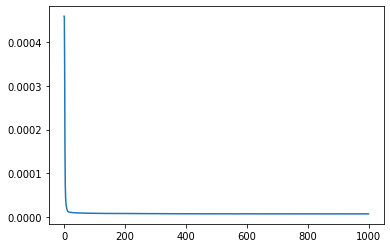

In [7]:
plt.plot(train_loss)

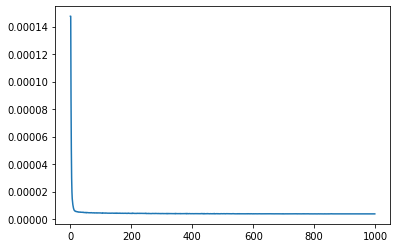

In [8]:
plt.plot(valid_loss)


In [9]:
np.argsort(train_loss)[:10]

array([978, 785, 967, 985, 911, 904, 834, 875, 955, 986])

In [10]:
np.argsort(valid_loss)[:10]

array([829, 957, 843, 964, 848, 833, 757, 961, 903, 744])

In [11]:
set(np.argsort(valid_loss)[:10]) & set(np.argsort(train_loss)[:10])

set()

# TEST

In [5]:
!python test.py \
--training-mode 'sinogram' \
--data-set 'TEST_Sinogram_DCM' \
--model-name 'ED_CNN' \
--save_dir '/workspace/sunggu/4.Dose_img2img/Predictions/Test/png/[Privious]ED_CNN/epoch_999/' \
--num_workers 4 \
--pin-mem \
--range-minus1-plus1 'False' \
--teacher_forcing "False" \
--resume '/workspace/sunggu/4.Dose_img2img/model/[Privious]ED_CNN/epoch_999_checkpoint.pth'

***********************************************
Dataset Name:  TEST_Sinogram_DCM
---------- Model ----------
Test Epoch:  999
Resume From:  /workspace/sunggu/4.Dose_img2img/model/[Privious]ED_CNN/epoch_999_checkpoint.pth
Output To:  /workspace/sunggu/4.Dose_img2img/Predictions/Test/png/[Privious]ED_CNN/epoch_999/
Loading dataset ....
TEST [Total]  number =  859
Creating model: ED_CNN
Number of Learnable Params: 80961
TEST:   0%|                                             | 0/859 [00:00<?, ?it/s]/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_20_CHO_HYE_F39_001_20210521_154508_00001.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_100_CHO_HYE_F39_001_20210521_154318_00001.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/pred_n_100_CHO_HYE_F39_001_20210521_154508_00001.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_20_CHO_HYE_F39_001_20210521_154508_00019.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_100_CHO_HYE_F39_001_20210521_154318_00019.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/pred_n_100_CHO_HYE_F39_001_20210521_154508_00019.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_20_CHO_HYE_F39_001_20210521_154508_00020.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_100_CHO_HYE_F39_001_20210521_154318_00020.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/pred_n_100_CHO_HYE_F39_001_20210521_154508_00020.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_20_CHO_HYE_F39_001_20210521_154508_0

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_20_CHO_HYE_F39_001_20210521_154509_00038.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_100_CHO_HYE_F39_001_20210521_154318_00038.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/pred_n_100_CHO_HYE_F39_001_20210521_154509_00038.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_20_CHO_HYE_F39_001_20210521_154509_00039.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_100_CHO_HYE_F39_001_20210521_154318_00039.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/pred_n_100_CHO_HYE_F39_001_20210521_154509_00039.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_HYE_F39/gt_n_20_CHO_HYE_F39_001_20210521_154509_0

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_160415_00001.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_160226_00001.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_160415_00001.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_160415_00002.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_160226_00002.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_160415_00002.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epo

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_160415_00019.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_160226_00019.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_160415_00019.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_160415_00020.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_160226_00020.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_160415_00020.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epo

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_160415_00036.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_160415_00037.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_160226_00037.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_160415_00037.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_160415_00038.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_160226_00038.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epo

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_160415_00054.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_160415_00055.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_160226_00055.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_160415_00055.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_160415_00056.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_A_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_160226_00056.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epo

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_161153_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_161342_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_161342_00016.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_161153_00016.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_161342_00016.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_161342_00017.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epo

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_161342_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_161153_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_161342_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_161342_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_161153_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_161342_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epo

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_161342_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_161153_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_161342_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_20_CHO_KYE_HWA_M80_001_20210521_161342_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/gt_n_100_CHO_KYE_HWA_M80_001_20210521_161153_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_KYE_HWA_B_M80/pred_n_100_CHO_KYE_HWA_M80_001_20210521_161342_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epo

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_20_CHO_MYE_F71_001_20210521_162245_00013.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_100_CHO_MYE_F71_001_20210521_162055_00013.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/pred_n_100_CHO_MYE_F71_001_20210521_162245_00013.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_20_CHO_MYE_F71_001_20210521_162245_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_100_CHO_MYE_F71_001_20210521_162055_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/pred_n_100_CHO_MYE_F71_001_20210521_162245_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_20_CHO_MYE_F71_001_20210521_162245_0

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_20_CHO_MYE_F71_001_20210521_162245_00032.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_100_CHO_MYE_F71_001_20210521_162055_00032.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/pred_n_100_CHO_MYE_F71_001_20210521_162245_00032.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_20_CHO_MYE_F71_001_20210521_162245_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_100_CHO_MYE_F71_001_20210521_162055_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/pred_n_100_CHO_MYE_F71_001_20210521_162245_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_20_CHO_MYE_F71_001_20210521_162245_0

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_20_CHO_MYE_F71_001_20210521_162245_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_100_CHO_MYE_F71_001_20210521_162055_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/pred_n_100_CHO_MYE_F71_001_20210521_162245_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_20_CHO_MYE_F71_001_20210521_162245_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_100_CHO_MYE_F71_001_20210521_162055_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/pred_n_100_CHO_MYE_F71_001_20210521_162245_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_MYE_F71/gt_n_20_CHO_MYE_F71_001_20210521_162245_0

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_100_CHO_SEO_LYE_F65_001_20210521_163014_00012.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/pred_n_100_CHO_SEO_LYE_F65_001_20210521_163157_00012.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_20_CHO_SEO_LYE_F65_001_20210521_163157_00013.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_100_CHO_SEO_LYE_F65_001_20210521_163014_00013.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/pred_n_100_CHO_SEO_LYE_F65_001_20210521_163157_00013.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_20_CHO_SEO_LYE_F65_001_20210521_163157_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_S

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_100_CHO_SEO_LYE_F65_001_20210521_163014_00030.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/pred_n_100_CHO_SEO_LYE_F65_001_20210521_163157_00030.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_20_CHO_SEO_LYE_F65_001_20210521_163157_00031.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_100_CHO_SEO_LYE_F65_001_20210521_163014_00031.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/pred_n_100_CHO_SEO_LYE_F65_001_20210521_163157_00031.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_20_CHO_SEO_LYE_F65_001_20210521_163157_00032.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_S

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/pred_n_100_CHO_SEO_LYE_F65_001_20210521_163157_00048.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_20_CHO_SEO_LYE_F65_001_20210521_163157_00049.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_100_CHO_SEO_LYE_F65_001_20210521_163014_00049.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/pred_n_100_CHO_SEO_LYE_F65_001_20210521_163157_00049.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_20_CHO_SEO_LYE_F65_001_20210521_163157_00050.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEO_LYE_F65/gt_n_100_CHO_SEO_LYE_F65_001_20210521_163014_00050.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_S

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/pred_n_100_CHO_SEU_M53_001_20210521_164102_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_20_CHO_SEU_M53_001_20210521_164102_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_100_CHO_SEU_M53_001_20210521_163912_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/pred_n_100_CHO_SEU_M53_001_20210521_164102_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_20_CHO_SEU_M53_001_20210521_164102_00016.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_100_CHO_SEU_M53_001_20210521_163912_00016.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/pred_n_100_CHO_SEU_M53_001_20210521_16410

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/pred_n_100_CHO_SEU_M53_001_20210521_164102_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_20_CHO_SEU_M53_001_20210521_164102_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_100_CHO_SEU_M53_001_20210521_163913_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/pred_n_100_CHO_SEU_M53_001_20210521_164102_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_20_CHO_SEU_M53_001_20210521_164102_00035.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_100_CHO_SEU_M53_001_20210521_163913_00035.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/pred_n_100_CHO_SEU_M53_001_20210521_16410

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/pred_n_100_CHO_SEU_M53_001_20210521_164102_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_20_CHO_SEU_M53_001_20210521_164102_00053.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_100_CHO_SEU_M53_001_20210521_163913_00053.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/pred_n_100_CHO_SEU_M53_001_20210521_164102_00053.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_20_CHO_SEU_M53_001_20210521_164102_00054.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/gt_n_100_CHO_SEU_M53_001_20210521_163913_00054.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_SEU_M53/pred_n_100_CHO_SEU_M53_001_20210521_16410

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/pred_n_100_CHO_YON_SOO_F65_001_20210521_165015_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_20_CHO_YON_SOO_F65_001_20210521_165015_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_100_CHO_YON_SOO_F65_001_20210521_164829_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/pred_n_100_CHO_YON_SOO_F65_001_20210521_165015_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_20_CHO_YON_SOO_F65_001_20210521_165015_00016.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_100_CHO_YON_SOO_F65_001_20210521_164829_00016.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_Y

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/pred_n_100_CHO_YON_SOO_F65_001_20210521_165015_00032.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_20_CHO_YON_SOO_F65_001_20210521_165015_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_100_CHO_YON_SOO_F65_001_20210521_164829_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/pred_n_100_CHO_YON_SOO_F65_001_20210521_165015_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_20_CHO_YON_SOO_F65_001_20210521_165015_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_100_CHO_YON_SOO_F65_001_20210521_164829_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_Y

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/pred_n_100_CHO_YON_SOO_F65_001_20210521_165016_00050.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_20_CHO_YON_SOO_F65_001_20210521_165016_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_100_CHO_YON_SOO_F65_001_20210521_164829_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/pred_n_100_CHO_YON_SOO_F65_001_20210521_165016_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_20_CHO_YON_SOO_F65_001_20210521_165016_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_YON_SOO_F65/gt_n_100_CHO_YON_SOO_F65_001_20210521_164829_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHO_Y

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_20_CHU_BYE_M49_001_20210521_170938_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_100_CHU_BYE_M49_001_20210521_170743_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/pred_n_100_CHU_BYE_M49_001_20210521_170938_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_20_CHU_BYE_M49_001_20210521_170938_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_100_CHU_BYE_M49_001_20210521_170743_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/pred_n_100_CHU_BYE_M49_001_20210521_170938_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_20_CHU_BYE_M49_001_20210521_170938_0

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_20_CHU_BYE_M49_001_20210521_170938_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_100_CHU_BYE_M49_001_20210521_170743_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/pred_n_100_CHU_BYE_M49_001_20210521_170938_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_20_CHU_BYE_M49_001_20210521_170938_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_100_CHU_BYE_M49_001_20210521_170743_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/pred_n_100_CHU_BYE_M49_001_20210521_170938_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_20_CHU_BYE_M49_001_20210521_170938_0

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/pred_n_100_CHU_BYE_M49_001_20210521_170938_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_20_CHU_BYE_M49_001_20210521_170938_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_100_CHU_BYE_M49_001_20210521_170743_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/pred_n_100_CHU_BYE_M49_001_20210521_170938_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_20_CHU_BYE_M49_001_20210521_170938_00053.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/gt_n_100_CHU_BYE_M49_001_20210521_170743_00053.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_BYE_M49/pred_n_100_CHU_BYE_M49_001_20210521_17093

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_20_CHU_EUL_YEO_M60_001_20210521_171940_00010.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_100_CHU_EUL_YEO_M60_001_20210521_171740_00010.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/pred_n_100_CHU_EUL_YEO_M60_001_20210521_171940_00010.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_20_CHU_EUL_YEO_M60_001_20210521_171940_00011.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_100_CHU_EUL_YEO_M60_001_20210521_171740_00011.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/pred_n_100_CHU_EUL_YEO_M60_001_20210521_171940_00011.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_E

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_20_CHU_EUL_YEO_M60_001_20210521_171941_00028.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_100_CHU_EUL_YEO_M60_001_20210521_171741_00028.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/pred_n_100_CHU_EUL_YEO_M60_001_20210521_171941_00028.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_20_CHU_EUL_YEO_M60_001_20210521_171941_00029.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_100_CHU_EUL_YEO_M60_001_20210521_171741_00029.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/pred_n_100_CHU_EUL_YEO_M60_001_20210521_171941_00029.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_E

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_20_CHU_EUL_YEO_M60_001_20210521_171941_00046.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_100_CHU_EUL_YEO_M60_001_20210521_171741_00046.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/pred_n_100_CHU_EUL_YEO_M60_001_20210521_171941_00046.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_20_CHU_EUL_YEO_M60_001_20210521_171941_00047.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/gt_n_100_CHU_EUL_YEO_M60_001_20210521_171741_00047.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUL_YEO_M60/pred_n_100_CHU_EUL_YEO_M60_001_20210521_171941_00047.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_E

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_20_CHU_EUN_SEO_F18_001_20210521_172947_00001.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_100_CHU_EUN_SEO_F18_001_20210521_172753_00001.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/pred_n_100_CHU_EUN_SEO_F18_001_20210521_172947_00001.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_20_CHU_EUN_SEO_F18_001_20210521_172947_00002.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_100_CHU_EUN_SEO_F18_001_20210521_172753_00002.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/pred_n_100_CHU_EUN_SEO_F18_001_20210521_172947_00002.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_E

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/pred_n_100_CHU_EUN_SEO_F18_001_20210521_172947_00018.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_20_CHU_EUN_SEO_F18_001_20210521_172947_00019.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_100_CHU_EUN_SEO_F18_001_20210521_172753_00019.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/pred_n_100_CHU_EUN_SEO_F18_001_20210521_172947_00019.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_20_CHU_EUN_SEO_F18_001_20210521_172947_00020.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_100_CHU_EUN_SEO_F18_001_20210521_172753_00020.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_E

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/pred_n_100_CHU_EUN_SEO_F18_001_20210521_172947_00036.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_20_CHU_EUN_SEO_F18_001_20210521_172947_00037.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_100_CHU_EUN_SEO_F18_001_20210521_172753_00037.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/pred_n_100_CHU_EUN_SEO_F18_001_20210521_172947_00037.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_20_CHU_EUN_SEO_F18_001_20210521_172947_00038.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_100_CHU_EUN_SEO_F18_001_20210521_172753_00038.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_E

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_20_CHU_EUN_SEO_F18_001_20210521_172947_00055.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_100_CHU_EUN_SEO_F18_001_20210521_172753_00055.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/pred_n_100_CHU_EUN_SEO_F18_001_20210521_172947_00055.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_20_CHU_EUN_SEO_F18_001_20210521_172947_00056.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/gt_n_100_CHU_EUN_SEO_F18_001_20210521_172753_00056.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_EUN_SEO_F18/pred_n_100_CHU_EUN_SEO_F18_001_20210521_172947_00056.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_E

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_20_CHU_HEE_JEO_F52_001_20210521_173914_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_100_CHU_HEE_JEO_F52_001_20210521_173730_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/pred_n_100_CHU_HEE_JEO_F52_001_20210521_173914_00014.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_20_CHU_HEE_JEO_F52_001_20210521_173914_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_100_CHU_HEE_JEO_F52_001_20210521_173730_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/pred_n_100_CHU_HEE_JEO_F52_001_20210521_173914_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_H

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_20_CHU_HEE_JEO_F52_001_20210521_173915_00032.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_100_CHU_HEE_JEO_F52_001_20210521_173730_00032.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/pred_n_100_CHU_HEE_JEO_F52_001_20210521_173915_00032.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_20_CHU_HEE_JEO_F52_001_20210521_173915_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_100_CHU_HEE_JEO_F52_001_20210521_173730_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/pred_n_100_CHU_HEE_JEO_F52_001_20210521_173915_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_H

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_20_CHU_HEE_JEO_F52_001_20210521_173915_00050.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_100_CHU_HEE_JEO_F52_001_20210521_173731_00050.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/pred_n_100_CHU_HEE_JEO_F52_001_20210521_173915_00050.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_20_CHU_HEE_JEO_F52_001_20210521_173915_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/gt_n_100_CHU_HEE_JEO_F52_001_20210521_173731_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HEE_JEO_F52/pred_n_100_CHU_HEE_JEO_F52_001_20210521_173915_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_H

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_20_CHU_HUN_SUK_M42_001_20210521_174836_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_100_CHU_HUN_SUK_M42_001_20210521_174641_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/pred_n_100_CHU_HUN_SUK_M42_001_20210521_174836_00015.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_20_CHU_HUN_SUK_M42_001_20210521_174836_00016.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_100_CHU_HUN_SUK_M42_001_20210521_174641_00016.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/pred_n_100_CHU_HUN_SUK_M42_001_20210521_174836_00016.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_H

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_20_CHU_HUN_SUK_M42_001_20210521_174836_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_100_CHU_HUN_SUK_M42_001_20210521_174641_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/pred_n_100_CHU_HUN_SUK_M42_001_20210521_174836_00033.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_20_CHU_HUN_SUK_M42_001_20210521_174836_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_100_CHU_HUN_SUK_M42_001_20210521_174641_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/pred_n_100_CHU_HUN_SUK_M42_001_20210521_174836_00034.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_H

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_20_CHU_HUN_SUK_M42_001_20210521_174836_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_100_CHU_HUN_SUK_M42_001_20210521_174641_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/pred_n_100_CHU_HUN_SUK_M42_001_20210521_174836_00051.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_20_CHU_HUN_SUK_M42_001_20210521_174836_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/gt_n_100_CHU_HUN_SUK_M42_001_20210521_174641_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HUN_SUK_M42/pred_n_100_CHU_HUN_SUK_M42_001_20210521_174836_00052.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_H

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/pred_n_100_CHU_HWA_M37_001_20210521_175829_00010.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_20_CHU_HWA_M37_001_20210521_175829_00011.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_100_CHU_HWA_M37_001_20210521_175634_00011.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/pred_n_100_CHU_HWA_M37_001_20210521_175829_00011.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_20_CHU_HWA_M37_001_20210521_175829_00012.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_100_CHU_HWA_M37_001_20210521_175634_00012.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/pred_n_100_CHU_HWA_M37_001_20210521_17582

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_20_CHU_HWA_M37_001_20210521_175829_00030.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_100_CHU_HWA_M37_001_20210521_175634_00030.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/pred_n_100_CHU_HWA_M37_001_20210521_175829_00030.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_20_CHU_HWA_M37_001_20210521_175829_00031.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_100_CHU_HWA_M37_001_20210521_175634_00031.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/pred_n_100_CHU_HWA_M37_001_20210521_175829_00031.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_20_CHU_HWA_M37_001_20210521_175829_0

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_20_CHU_HWA_M37_001_20210521_175829_00049.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_100_CHU_HWA_M37_001_20210521_175634_00049.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/pred_n_100_CHU_HWA_M37_001_20210521_175829_00049.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_20_CHU_HWA_M37_001_20210521_175829_00050.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_100_CHU_HWA_M37_001_20210521_175634_00050.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/pred_n_100_CHU_HWA_M37_001_20210521_175829_00050.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_HWA_M37/gt_n_20_CHU_HWA_M37_001_20210521_175829_0

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/pred_n_100_CHU_LYE_HOO_F50_001_20210521_180811_00007.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_20_CHU_LYE_HOO_F50_001_20210521_180811_00008.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_100_CHU_LYE_HOO_F50_001_20210521_180624_00008.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/pred_n_100_CHU_LYE_HOO_F50_001_20210521_180811_00008.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_20_CHU_LYE_HOO_F50_001_20210521_180811_00009.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_100_CHU_LYE_HOO_F50_001_20210521_180624_00009.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_L

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_100_CHU_LYE_HOO_F50_001_20210521_180624_00025.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/pred_n_100_CHU_LYE_HOO_F50_001_20210521_180812_00025.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_20_CHU_LYE_HOO_F50_001_20210521_180812_00026.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_100_CHU_LYE_HOO_F50_001_20210521_180624_00026.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/pred_n_100_CHU_LYE_HOO_F50_001_20210521_180812_00026.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_20_CHU_LYE_HOO_F50_001_20210521_180812_00027.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_L

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/pred_n_100_CHU_LYE_HOO_F50_001_20210521_180812_00043.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_20_CHU_LYE_HOO_F50_001_20210521_180812_00044.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_100_CHU_LYE_HOO_F50_001_20210521_180624_00044.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/pred_n_100_CHU_LYE_HOO_F50_001_20210521_180812_00044.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_20_CHU_LYE_HOO_F50_001_20210521_180812_00045.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_LYE_HOO_F50/gt_n_100_CHU_LYE_HOO_F50_001_20210521_180624_00045.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_L

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/pred_n_100_CHU_SOO_SEO_F65_001_20210521_165937_00006.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_20_CHU_SOO_SEO_F65_001_20210521_165937_00007.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_100_CHU_SOO_SEO_F65_001_20210521_165744_00007.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/pred_n_100_CHU_SOO_SEO_F65_001_20210521_165937_00007.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_20_CHU_SOO_SEO_F65_001_20210521_165937_00008.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_100_CHU_SOO_SEO_F65_001_20210521_165744_00008.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_S

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/pred_n_100_CHU_SOO_SEO_F65_001_20210521_165937_00024.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_20_CHU_SOO_SEO_F65_001_20210521_165937_00025.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_100_CHU_SOO_SEO_F65_001_20210521_165744_00025.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/pred_n_100_CHU_SOO_SEO_F65_001_20210521_165937_00025.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_20_CHU_SOO_SEO_F65_001_20210521_165937_00026.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_100_CHU_SOO_SEO_F65_001_20210521_165744_00026.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_S

/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_20_CHU_SOO_SEO_F65_001_20210521_165937_00043.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_100_CHU_SOO_SEO_F65_001_20210521_165744_00043.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/pred_n_100_CHU_SOO_SEO_F65_001_20210521_165937_00043.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_20_CHU_SOO_SEO_F65_001_20210521_165937_00044.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/gt_n_100_CHU_SOO_SEO_F65_001_20210521_165744_00044.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_SOO_SEO_F65/pred_n_100_CHU_SOO_SEO_F65_001_20210521_165937_00044.dcm
/workspace/sunggu/4.Dose_img2img/Predictions/Test/dcm/[Privious]ED_CNN/epoch_999/CHU_S

##### 978 epoch

In [ ]:

Original === 
PSNR avg: 54.4628 
SSIM avg: 0.9956 
RMSE avg: 7.9607


Predictions === 
PSNR avg: 57.6190 
SSIM avg: 0.9980 
RMSE avg: 5.5423
***********************************************